/home/dzsun/.local/lib/python3.9/site-packages/gw_eccentricity-0.0.dev0-py3.9.egg/gw_eccentricity/eccDefinition.py:555: UserWarning: At least a pair of apocenters are too widely separated from each other near the end of the data.
This implies that a apocenter might be missing.
First pair of such apocenters are [7071344, 7153829] at t=[-9286.560037044575, -8461.710037476689].
phase22 difference between this pair of apocenters=1.69*4pi
phase22 difference between the previous pair of apocenters=1.06*4pi
apocenters after 7071344, i.e.,t > t=-9286.560037044575 are therefore dropped.
/home/dzsun/.local/lib/python3.9/site-packages/gw_eccentricity-0.0.dev0-py3.9.egg/gw_eccentricity/eccDefinition.py:631: UserWarning: At least a pair of pericenters are too close to each other with phase22 difference = 0.98*4pi.
 First pair of such extrema is located in the second half of the pericenters locations between [7045040, 7093517],i.e., t=[-9549.60003691 -9064.83003716].
pericenters after 7045040 i.e., 

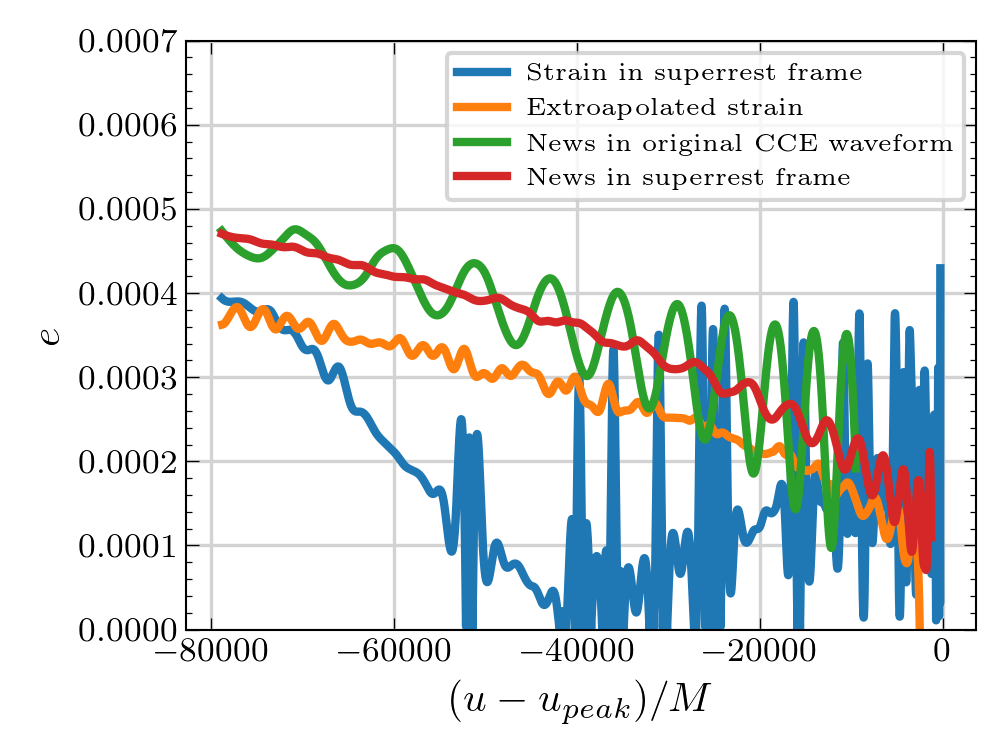

In [2]:
import scri
import numpy as np
import spherical_functions as sf
import matplotlib.pyplot as plt
from gw_eccentricity import measure_eccentricity
from gw_eccentricity import get_available_methods
from gw_eccentricity.plot_settings import use_fancy_plotsettings, labelsDict
use_fancy_plotsettings()
plt.style.use('paper.mplstyle')
#plt.rcParams.update({'font.size': 14})

def MT_to_WM(h_mts, sxs_version=False, dataType=scri.h):
    """Convert a ModesTimeSeries object to a scri or a sxs WaveformModes object.
    Parameters
    ----------
    h_mts: ModesTimesSeries
        ModesTimeSeries object to be converted to WaveformModes object.
    sxs_version: bool, default is False
        If True (False), then return the sxs (scri) WaveformModes object. Default is False.
    dataType: int, default is 7 (scri.h)
        Data type of the WaveformModes object, e.g., scri.h or scri.hdot. Default is 7, i.e., scri.h
    """
    if not sxs_version:
        h = scri.WaveformModes(
            t=h_mts.t,
            data=np.array(h_mts)[:, sf.LM_index(abs(h_mts.s), -abs(h_mts.s), 0) :],
            ell_min=abs(h_mts.s),
            ell_max=h_mts.ell_max,
            frameType=scri.Inertial,
            dataType=dataType,
        )
        h.r_is_scaled_out = True
        h.m_is_scaled_out = True
        return h
    else:
        h = sxs.WaveformModes(
            input_array=np.array(h_mts)[:, LM_index(abs(h_mts.s), -abs(h_mts.s), 0) :],
            time=h_mts.t,
            time_axis=0,
            modes_axis=1,
            ell_min=abs(h_mts.s),
            ell_max=h_mts.ell_max,
            spin_weight=h_mts.s,
        )
        return h
"""
abd2=scri.SpEC.create_abd_from_h5("CCE",h='/panfs/ds09/sxs/dzsun/SimAnnex/Public/HybTest/001/Lev3/rhOverM_Asymptotic_GeometricUnits_CoM.h5/Extrapolated_N4.dir')
t0=-abd2.t[np.argmax(np.linalg.norm(abd2.sigma.bar,axis=1))]
abd2.t=abd2.t+t0
newsEx=MT_to_WM(2.0*abd2.sigma.bar.dot, dataType=scri.hdot)
EccTime=np.arange(-80000,0,0.01,dtype=float)
W_Ecc=newsEx.interpolate(EccTime)
dataDict = {"t": W_Ecc.t,
       "hlm": {(2, 2): W_Ecc.data[:,4]}}
tref_in = np.arange(-79000,0,10,dtype=float)
gwecc_dict = measure_eccentricity(tref_in=tref_in,
                          method='Amplitude',
                          dataDict=dataDict,
                          extra_kwargs={"debug": False})
tref_outExNews = gwecc_dict["tref_out"]
ecc_refExNews = gwecc_dict["eccentricity"]
"""
cce_dir='/home/dzsun/CCEAnnex/Public/HybTest/001_CCE/Lev3/CCE'
abd=scri.SpEC.create_abd_from_h5("CCE",h=cce_dir+'/Strain.h5',Psi4=cce_dir+'/Psi4.h5',Psi3=cce_dir+'/Psi3.h5',Psi2=cce_dir+'/Psi2.h5',Psi1=cce_dir+'/Psi1.h5',Psi0=cce_dir+'/Psi0.h5')
t0=-abd.t[np.argmax(np.linalg.norm(abd.sigma.bar,axis=1))]
abd.t=abd.t+t0

abd1=abd
news = MT_to_WM(2.0 * abd1.sigma.bar.dot, dataType=scri.hdot)
EccTime=np.arange(-80000,0,0.01,dtype=float)
W_Ecc=news.interpolate(EccTime)
dataDict = {"t": W_Ecc.t,
       "hlm": {(2, 2): W_Ecc.data[:,4]}}
tref_in = np.arange(-79000,0,10,dtype=float)
gwecc_dict = measure_eccentricity(tref_in=tref_in,
                          method='AmplitudeFits',
                          dataDict=dataDict,
                          extra_kwargs={"debug": False})
tref_out = gwecc_dict["tref_out"]
ecc_ref = gwecc_dict["eccentricity"]

abd1,trans=abd.map_to_superrest_frame(t_0=-70000)
W_temp=scri.WaveformModes()
W_temp.t=abd1.t
W_temp.data=2*abd1.sigma.bar
W_temp.data=np.copy(W_temp.data[:,4:])
W_temp.ells=2,8
outname='Out/NR001.h5'
scri.SpEC.write_to_h5(W_temp, outname, file_write_mode='w')
news1 = MT_to_WM(2.0 * abd1.sigma.bar.dot, dataType=scri.hdot)
EccTime=np.arange(-80000,0,0.01,dtype=float)
W_Ecc=W_temp.interpolate(EccTime)
dataDict = {"t": W_Ecc.t,
       "hlm": {(2, 2): W_Ecc.data[:,4]}}
tref_in = np.arange(-79000,0,10,dtype=float)
gwecc_dict = measure_eccentricity(tref_in=tref_in,
                          method='AmplitudeFits',
                          dataDict=dataDict,
                          extra_kwargs={"debug": False})
tref_outSRS = gwecc_dict["tref_out"]
ecc_refSRS = gwecc_dict["eccentricity"]

EccTime=np.arange(-80000,0,0.01,dtype=float)
W_Ecc=news1.interpolate(EccTime)
dataDict = {"t": W_Ecc.t,
       "hlm": {(2, 2): W_Ecc.data[:,4]}}
tref_in = np.arange(-79000,0,10,dtype=float)
gwecc_dict = measure_eccentricity(tref_in=tref_in,
                          method='AmplitudeFits',
                          dataDict=dataDict,
                          extra_kwargs={"debug": False})
tref_outSR = gwecc_dict["tref_out"]
ecc_refSR = gwecc_dict["eccentricity"]

NRFileName='/panfs/ds09/sxs/dzsun/SimAnnex/Public/HybTest/001/Lev3/rhOverM_Asymptotic_GeometricUnits_CoM.h5/Extrapolated_N4.dir'
W1=scri.SpEC.read_from_h5(NRFileName)
t0=-W1.t[np.argmax(np.linalg.norm(W1.data,axis=1))]
W1.t=W1.t+t0
EccTime=np.arange(-80000,0,0.01,dtype=float)
W_Ecc=W1.interpolate(EccTime)
dataDict = {"t": W_Ecc.t,
       "hlm": {(2, 2): W_Ecc.data[:,4]}}
tref_in = np.arange(-79000,0,10,dtype=float)
gwecc_dict = measure_eccentricity(tref_in=tref_in,
                          method='AmplitudeFits',
                          dataDict=dataDict,
                          extra_kwargs={"debug": False})
tref_outEx = gwecc_dict["tref_out"]
ecc_refEx = gwecc_dict["eccentricity"]

plt.style.use('default')
plt.style.use('paper.mplstyle')
fig1, (ax1) = plt.subplots(1,1)
ax1.plot(tref_outSRS,abs(ecc_refSRS), linewidth=2, label='Strain in superrest frame')
ax1.plot(tref_outEx,ecc_refEx, linewidth=2, label='Extroapolated strain')
ax1.plot(tref_out,ecc_ref, linewidth=2, label='News in original CCE waveform')
#ax1.plot(tref_outExNews,ecc_refExNews, linewidth=2.5, label='Using extroapolated news')
ax1.plot(tref_outSR,ecc_refSR, linewidth=2, label='News in superrest frame')
ax1.set_ylabel(r'$e$')
ax1.set_xlabel(r'$(u-u_{peak})/M$')
ax1.set_xticks(-20000*np.array([4,3,2,1,0]))
ax1.set_xticks(-20000*np.array([4,3,2,1,0]))
ax1.set_ylim((0,0.0007))
ax1.legend()
plt.grid()
fig1.savefig("EccSupertranslate.pdf", bbox_inches = 'tight')

In [ ]:
import matplotlib.pyplot as plt
import numpy as np
#End
x=np.array([3,5,10,15,20,25,30,35])
In013=np.array([5.7094568970851254e-05,8.312416212647483e-05,0.00019179958633525708,0.0001669662229519273,0.00019423420578588947,0.0003233332213479617,0.00044486773873602574,0.0005829977286280475])
chiA_norm=np.array([0.0868621551468911,0.10888507070595821,0.08177320574374403,0.04212994150508065,0.03331239778312728,0.03365507633508347,0.02815968907594457,0.022280073412496326])
chiB_norm=np.array([0.023209894394093322,0.026132018717996974,0.09962499882174847,0.05752798446527163,0.06010899141809506,0.03390730090921956,0.03132137911871019,0.031443700426446564])
chiA_L=np.array([0.2887329662067748,0.0178507222567006,0.06247775178406895,0.037206369514967585,0.01673347495808103,0.015064804436610985,0.004087458614912914,0.007457184244510362])
chiB_L=np.array([0.547600919015989,0.5661383968767838,0.7537138576284228,0.06653413214396292,0.0693412668107466,0.030876772840251088,0.02572496789167078,0.029820323689088213])
q=np.array([0.03307006983934091,0.09954106407485552,0.04436463944895275,0.009530685181273313,0.003510601391221835,0.0008233954637399954,0.007404392103828483,0.012098198899075152])
fig1, (ax1) = plt.subplots(1,1)
ax1.plot(x,In013,marker='o', label='epsilon in matching window')
ax1.plot(x,chiA_norm,marker='o', label='error in chiA_norm')
ax1.plot(x,chiB_norm,marker='o', label='error in chiB_norm',color='#ff7f0e', linestyle='dotted')
ax1.plot(x,chiA_L,marker='o', label='error in chiA_L')
ax1.plot(x,chiB_L,marker='o', label='error in chiB_L',color= '#2ca02c', linestyle='dotted')
ax1.plot(x,q,marker='o', label='difference in q')
ax1.legend()
ax1.set_yscale('log')
ax1.set_ylabel("Error")
ax1.set_xlabel("Length of matching window in orbits")
plt.grid()
#plt.rcParams.update({'font.size': 12})
fig1.savefig("WindowLengthPre.pdf",dpi=1000, bbox_inches = 'tight')

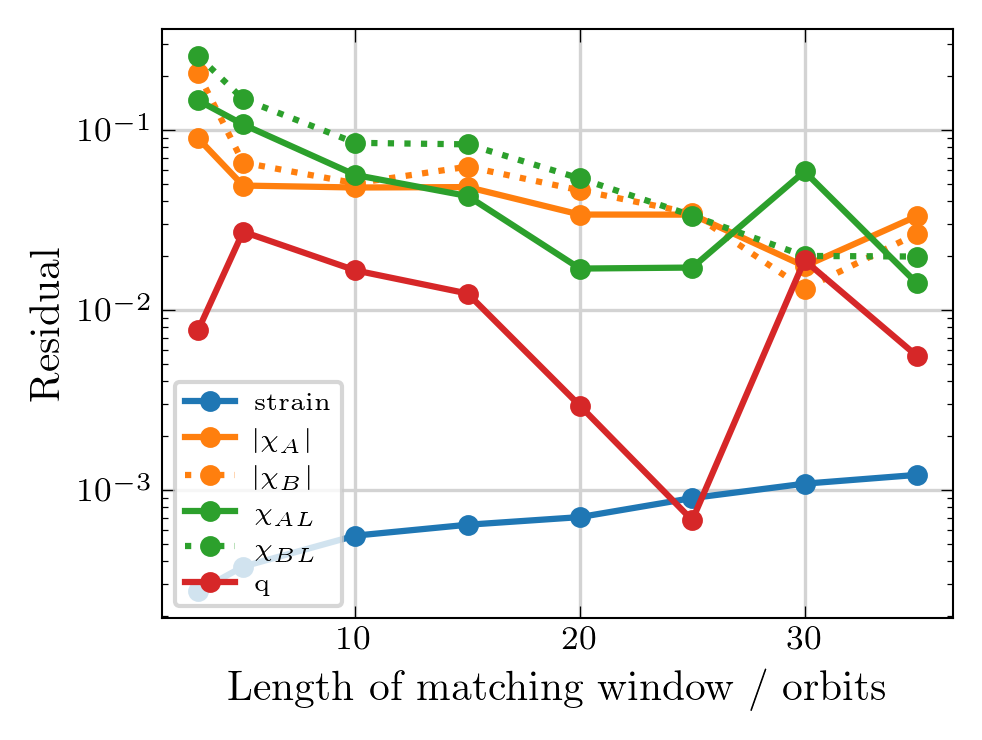

In [1]:
import matplotlib.pyplot as plt
import numpy as np
plt.style.use('paper.mplstyle')
#-5000
x=np.array([3,5,10,15,20,25,30,35])
In013=np.array([2.97748362e-05,5.61279935e-05,1.23909794e-04,1.63723109e-04,1.99085924e-04,3.24066206e-04,4.67993411e-04,5.86096951e-04])
chiA_norm=np.array([8.96138104e-02,4.90282276e-02,4.78287463e-02,4.80809415e-02,3.38331499e-02,3.37960152e-02,1.74747908e-02,3.31357916e-02])
chiB_norm=np.array([2.06335573e-01,6.58244731e-02,5.04627569e-02,6.24300029e-02,4.61187155e-02,3.44214631e-02, 1.30696918e-02,2.64310602e-02])
chiA_L=np.array([1.45676111e-01,1.07147795e-01,5.61298384e-02,4.28866113e-02,1.69555561e-02,1.71747776e-02,5.87176109e-02,1.40685215e-02])
chiB_L=np.array([2.57654360e-01,1.48104411e-01,8.47022553e-02,8.30589027e-02,5.36833655e-02,3.33791828e-02, 1.99306669e-02,1.97751528e-02])
q=np.array([7.71758498e-03,2.71636199e-02,1.65642358e-02,1.23224723e-02, 2.93246673e-03,6.78294601e-04,1.88464780e-02,5.55326322e-03])
fig1, (ax1) = plt.subplots(1,1)
ax1.plot(x,np.sqrt(In013)*0.05,marker='o',markersize=4, label='strain')
ax1.plot(x,chiA_norm,marker='o',markersize=4, label=r'$|\chi_A|$')#**2.0/4.68655259e-01**2.0
ax1.plot(x,chiB_norm,marker='o',markersize=4, label=r'$|\chi_B|$',color='#ff7f0e', linestyle='dotted')#**2.0/4.70371470e-01**2.0
ax1.plot(x,chiA_L,marker='o',markersize=4, label=r'$\chi_{AL}$')#**2.0/2.39607164e-01**2.0
ax1.plot(x,chiB_L,marker='o',markersize=4, label=r'$\chi_{BL}$',color= '#2ca02c', linestyle='dotted')#**2.0/3.30700640e-01**2.0
ax1.plot(x,q,marker='o',markersize=4, label='q')#**2.0/1.90746380**2.0
ax1.legend()
ax1.set_yscale('log')
ax1.set_ylabel('Residual')
ax1.set_xlabel("Length of matching window / orbits")
plt.grid()
#plt.rcParams.update({'font.size': 14})
fig1.savefig("WindowLengthPre.pdf", bbox_inches = 'tight')

In [ ]:
import matplotlib.pyplot as plt
import numpy as np

x=np.array([3,5,10,15,20,25,30,35])
In011=np.array([1.5471659950248944e-05,3.551599656543182e-05,9.33946096040871e-05,0.00011032301836076448,0.00010452895802433044,7.663185956714696e-05,6.176060268943947e-05,7.117163482451317e-05])
chiA_norm=np.array([0.0078013429732178285,0.006852069092266433,0.006820390697041767,0.026272633241340715,0.01596721857381994,0.0023647522542143973,0.0028020978278974207,0.01096604179793581])
chiB_norm=np.array([0.007732878250787667,0.02973033169954309,0.014147014479098108,0.020974938009252153,0.014542273384483384,0.006380970305548073, 0.0008265232491017627,0.0024579293353402254])
chiA_L=np.array([0.007644303345466619,0.006459021763668693,0.0034781581416020724,0.02224704183431364,0.01396358334298542,0.007200695254450884,0.005528757260449657,0.011962043784424559])
chiB_L=np.array([0.02358691636053419,0.05190142179705098,0.014211192705865301,0.004541197124813823,0.004956202545646243,0.0025567878793559956,0.0033713287632226405,0.0034274865887592224])
q=np.array([0.02107340821946524,0.030622158346554684,0.018615230209421796,0.026417838791841897,0.02414103076096441,0.02072352197846339,0.01789616980436004,0.019479717577671085])
fig1, (ax1) = plt.subplots(1,1)
ax1.plot(x,In011,marker='o', label='epsilon in matching window')
ax1.plot(x,chiA_norm,marker='o', label='error in chiA_norm')
ax1.plot(x,chiB_norm,marker='o', label='error in chiB_norm',color='#ff7f0e', linestyle='dotted')
ax1.plot(x,chiA_L,marker='o', label='error in chiA_L')
ax1.plot(x,chiB_L,marker='o', label='error in chiB_L',color= '#2ca02c', linestyle='dotted')
ax1.plot(x,q,marker='o', label='difference in q')
ax1.legend()
ax1.set_yscale('log')
ax1.set_ylabel("Error")
ax1.set_xlabel("Length of matching window in orbits")
plt.grid()
plt.rcParams.update({'font.size': 12})
fig1.savefig("WindowLength011.pdf",dpi=1000, bbox_inches = 'tight')

In [ ]:
import matplotlib.pyplot as plt
import numpy as np

x=np.array([0,1,2,3])
In011=np.array([0.01669758321021581,8.625041543064859e-05, 7.5417780922986e-05,7.663185956714696e-05])
chiA_norm=np.array([0.0790522529655307,0.0017187482627540884,0.05390530185886239,0.0023647522542143973])
chiB_norm=np.array([0.022795752025162486,0.03516404826884956,0.016549343152870155,0.006380970305548073])
chiA_L=np.array([0.06630795863947508,0.00553562110597644,0.05417087349679223,0.007200695254450884])
chiB_L=np.array([0.1668841999757625,0.012926256889442114,0.001974453323373704,0.0025567878793559956])
q=np.array([0.17644854875818705,0.009154006121227187,0.03041873569297948,0.02072352197846339])
fig1, (ax1) = plt.subplots(1,1)
ax1.plot(x,In011,marker='o', label='epsilon in matching window')
ax1.plot(x,chiA_norm,marker='o', label='error in chiA_norm')
ax1.plot(x,chiB_norm,marker='o', label='error in chiB_norm',color='#ff7f0e', linestyle='dotted')
ax1.plot(x,chiA_L,marker='o', label='error in chiA_L')
ax1.plot(x,chiB_L,marker='o', label='error in chiB_L',color= '#2ca02c', linestyle='dotted')
ax1.plot(x,q,marker='o', label='difference in q')
ax1.legend()
ax1.set_yscale('log')
ax1.set_ylabel("Error")
ax1.set_xlabel("Number of iteration between BMS frame fixing and PN parameter optimization")

In [ ]:
1.479966893997566-1.462070724193206

In [ ]:
import matplotlib.pyplot as plt
import numpy as np

x=np.array([3,5,10,15,20,25,30,35])
PN35011=np.array([2.30444132e-05,9.12146299e-05,1.75276364e-04,1.43369354e-04, 7.10661350e-05,7.95311249e-05, 6.26829371e-05,6.94474473e-05])
PN25011=np.array([1.598295588216134e-05,5.019772375132794e-05,0.00012676778975773454,0.0001688391033911361,0.0001389828419736135,0.0003223080832472229,0.0022462983646139444, 0.0013876524947558767])
PN20011=np.array([0.00013921370542532084,0.0001230924292728093,0.00013805530632890654,0.00012979373139843691,0.00011846776173691816 ,7.23984065546902e-05 ,0.00011461174727629358,0.0032977400949910263])
PN15011=np.array([5.826058194563677e-05,0.00032545788986903845,0.0002905457868602361,0.000522095034071463,8.934604249348503e-05,8.38038118660025e-05 ,0.00010330477485384097,0.000133367002261561])
fig1, (ax1) = plt.subplots(1,1)
ax1.plot(x,PN35011,marker='o', label='3.5 PN')
ax1.plot(x,PN25011,marker='o', label='2.5 PN')
ax1.plot(x,PN20011,marker='o', label='2.0 PN')
ax1.plot(x,PN15011,marker='o', label='1.5 PN')
ax1.legend()
ax1.set_yscale('log')
ax1.set_ylabel("epsilon")
ax1.set_xlabel("Length of matching window in orbits")

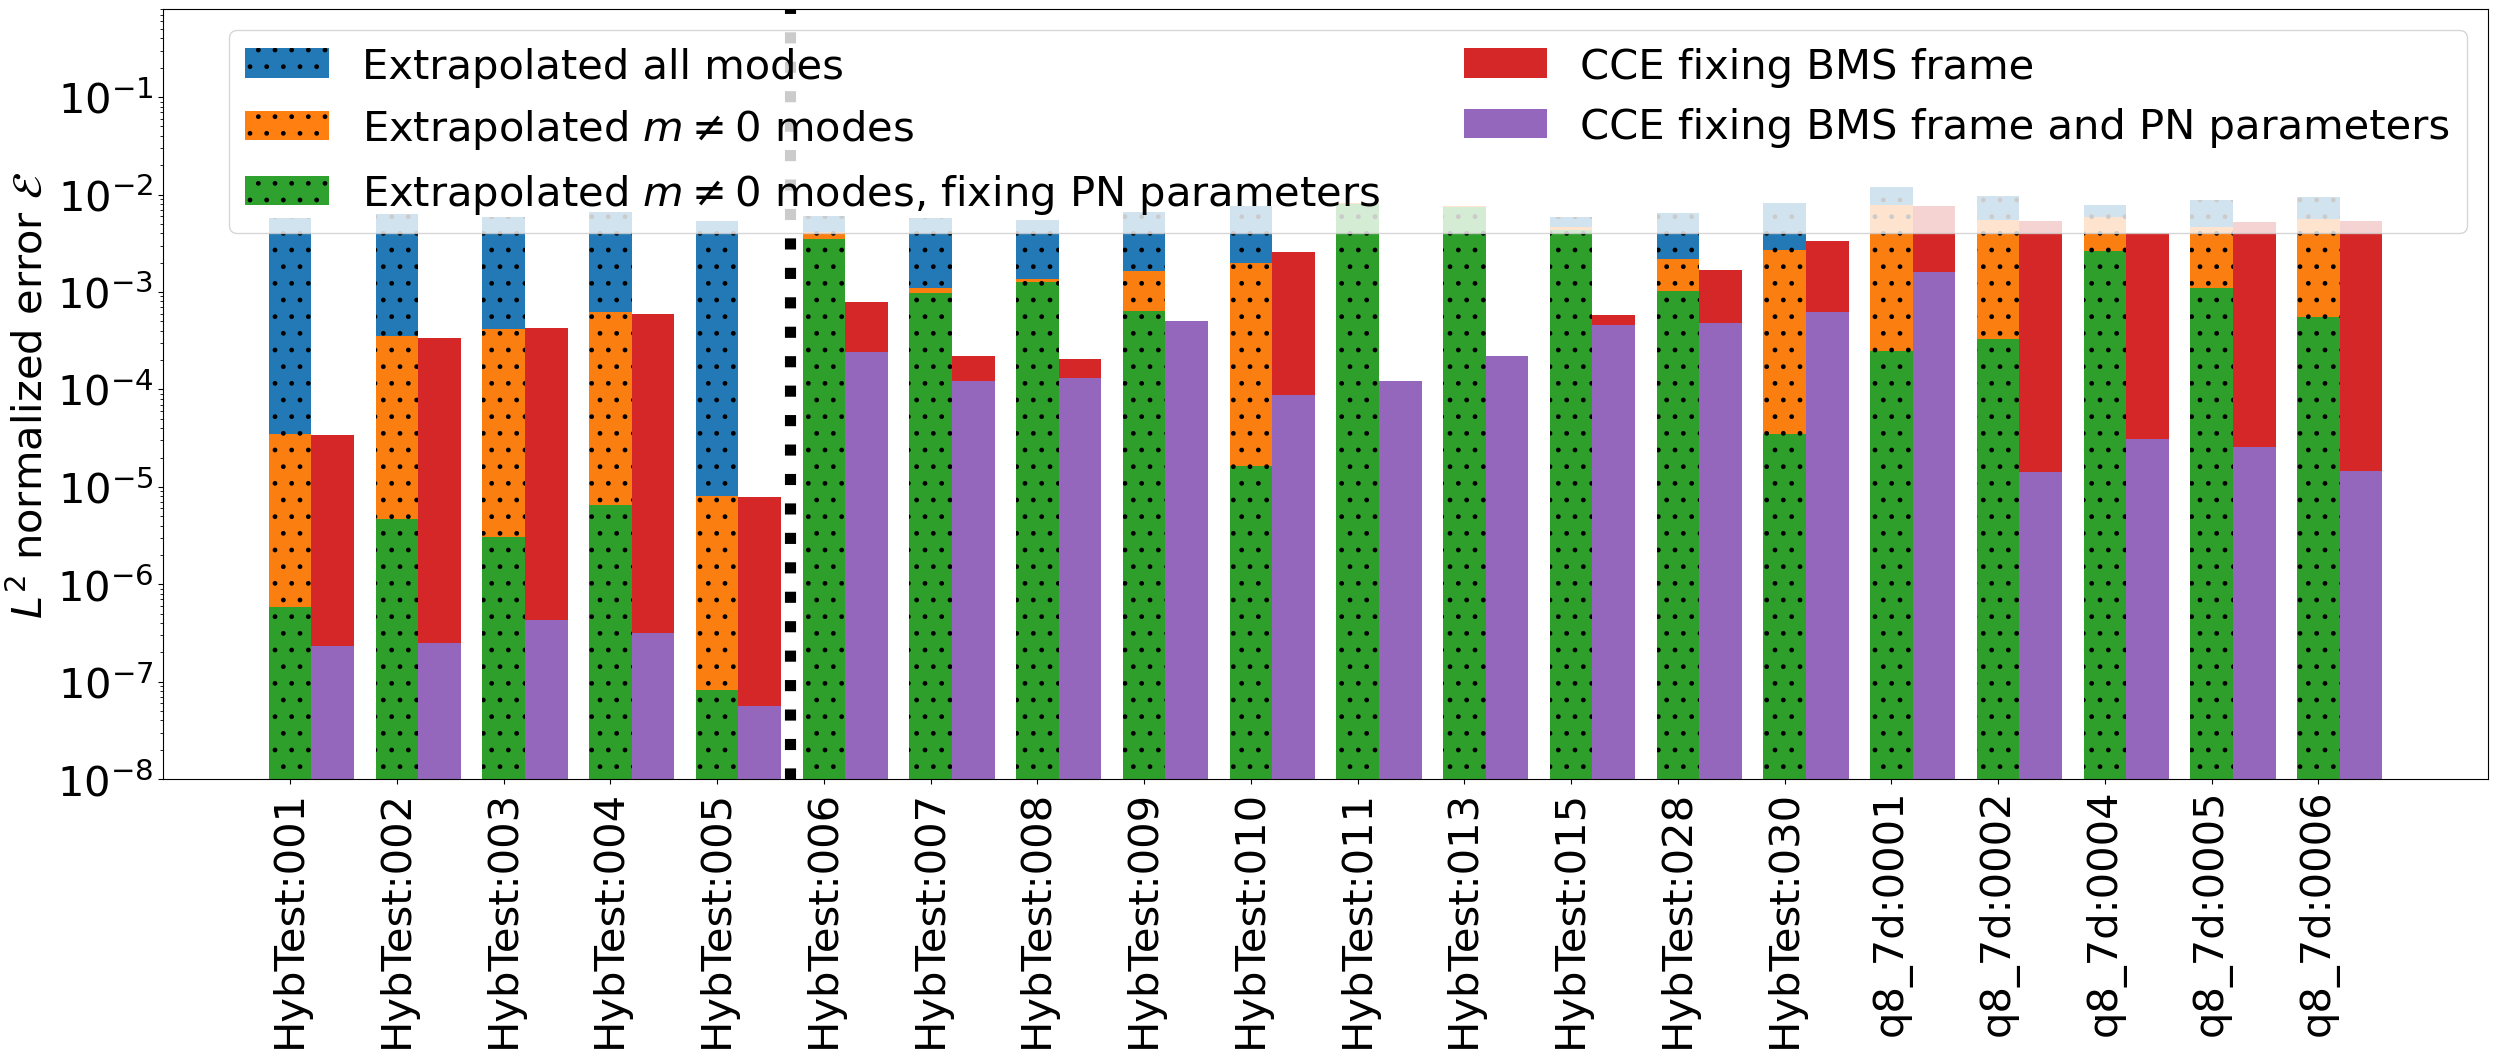

In [2]:
import matplotlib.pyplot as plt
import numpy as np

x=2*np.arange(20)+1
x_ticks=['HybTest:001', 'HybTest:002', 'HybTest:003', 'HybTest:004', 'HybTest:005', 'HybTest:006', 'HybTest:007', 'HybTest:008', 'HybTest:009', 'HybTest:010', 'HybTest:011', 'HybTest:013', 'HybTest:015', 'HybTest:028', 'HybTest:030', 'q8_7d:0001', 'q8_7d:0002', 'q8_7d:0004', 'q8_7d:0005', 'q8_7d:0006']
ExtAllMode=np.array([0.00579201116834678, 0.006330462101755548, 0.005942479904117699, 0.006594631309905739, 0.005360339823731156, 0.0060941139440672774, 0.005755070471679065, 0.005547824535533354, 0.006621707345047137, 0.007583832783376543, 0.00543066742088291, 0.005713710811924843, 0.005946348121078172, 0.006397005074916642, 0.008100263659439664, 0.011927318452743883, 0.009578647833782887, 0.007873889281257889, 0.00875670013775199, 0.009543629988356065])
Ext=np.array([3.467206113866925e-05, 0.0003541102304619813, 0.0004213091919081734, 0.000627275713927385, 8.056659124823134e-06, 0.004089396684406592, 0.001091680128911415, 0.00135628730926695, 0.0016295899582857317, 0.0019754068633272576, 0.008183225294449856, 0.007604406573286772, 0.004698165577456524, 0.0021932459167575023, 0.002698967621864642, 0.007754082565451652, 0.005474757878205128, 0.005842479544427548, 0.004654845626240402, 0.005634862262950463])
ExtPN=np.array([5.885369470871178e-07, 4.719880587648515e-06, 3.0803434292237987e-06, 6.5716020697758285e-06, 8.218106853084892e-08, 0.0035228841204672473, 0.0009854630142403819, 0.0012682540961648108, 0.0006440809458610687, 1.655894274570234e-05, 0.0080332362151239, 0.0074830711845342325, 0.004376951329831837, 0.0010159586647845139, 3.4970405228629534e-05, 0.00024586345282884715, 0.00033218318831416434, 0.002647487718012555, 0.0011103744680364233, 0.000547389448388934])
BMS=np.array([3.393736648602412e-05, 0.0003375957828598188, 0.0004252885679885439, 0.0005975226282885756, 7.850878746566608e-06, 0.0007987436057823379, 0.00022170838043099233, 0.00020305064068549302,0.00021798204628486938, 0.0025600321862768224, 0.00011344297525486888, 0.00015806271042265649, 0.0005788827303186993, 0.00166311156477537, 0.003305342113153421, 0.007585565443596262, 0.005377665333687135, 0.004042675701244224, 0.005235666036666248, 0.005326094730717793])
BMSPN=np.array([2.3470067380909925e-07, 2.492203205648243e-07, 4.266084269941567e-07, 3.181402115900297e-07, 5.673512052786375e-08, 0.00024364543333970195, 0.00012172948782547942, 0.00013036565817028516, 0.0005066133159742638, 8.666967159931955e-05, 0.00012092840600087377, 0.0002191873604802857, 0.00046117486384540153, 0.0004813348472953034, 0.0006198746856629144, 0.0016145970445020199, 1.4150311624123782e-05, 3.085166151332898e-05, 2.549301280792441e-05, 1.4518597939091939e-05])
fig1, (ax1) = plt.subplots(1,1,figsize=(30, 10))
width=0.8
plt.xticks(x, x_ticks, rotation=90)
ax1.bar(x,ExtAllMode, label='Extrapolated all modes',hatch='.',alpha=0.99)
ax1.bar(x,Ext, label=r'Extrapolated $m\neq 0$ modes',hatch='.',alpha=0.99)
ax1.bar(x,ExtPN, label=r'Extrapolated $m\neq 0$ modes, fixing PN parameters',hatch='.',alpha=0.99)
ax1.bar(x+width,BMS, label='CCE fixing BMS frame')
ax1.bar(x+width,BMSPN, label='CCE fixing BMS frame and PN parameters')
ax1.axvline(10.36, linestyle='dotted', linewidth=8,color='k')
ax1.legend(ncol=2)
ax1.set_yscale('log')
ax1.set_ylabel(r'$L^2$'+' normalized error '+r'$\mathcal{E}$')
#ax1.set_xlabel("Length of matching window in orbits")
ax1.set_ylim((1e-8,0.8))
plt.rcParams.update({'font.size': 30})
fig1.savefig("Improvement.pdf",format="pdf",dpi=1000, bbox_inches = 'tight')

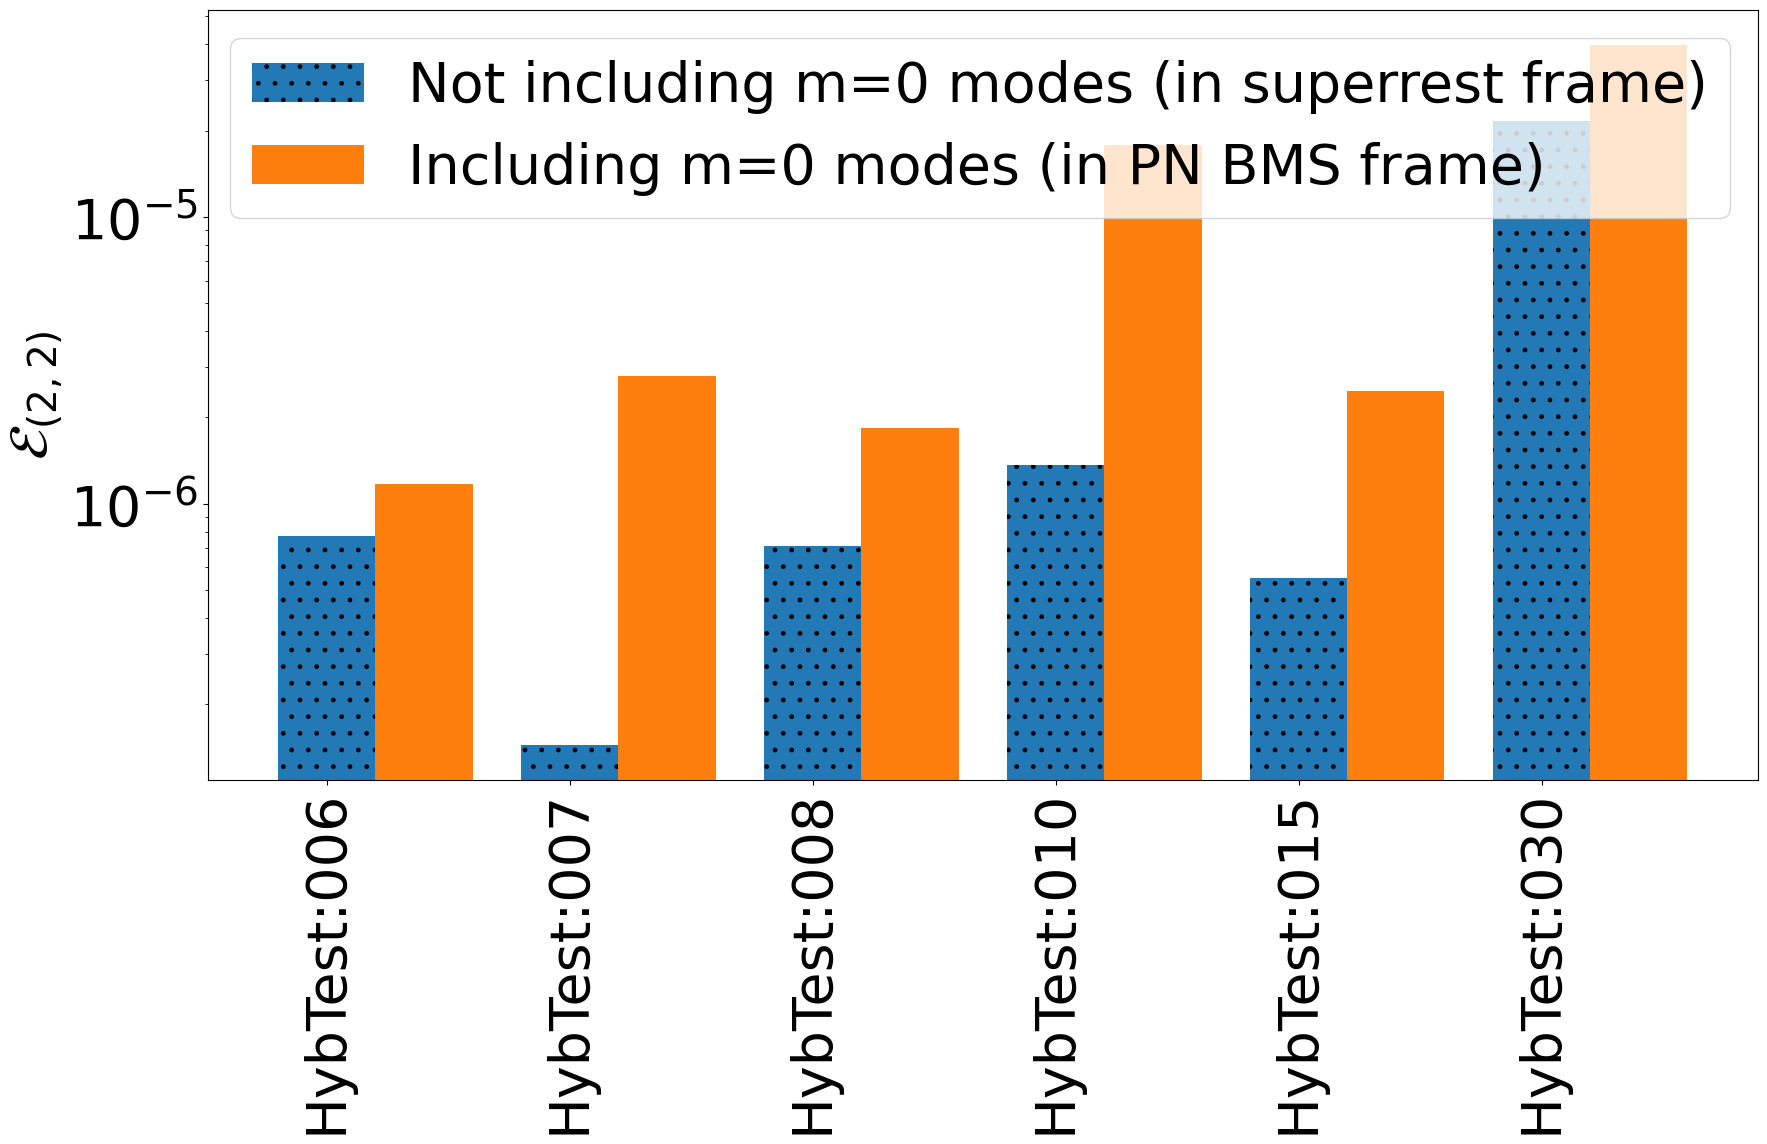

In [14]:
import matplotlib.pyplot as plt
import numpy as np

x=2*np.arange(6)+1
x_ticks=['HybTest:006', 'HybTest:007', 'HybTest:008', 'HybTest:010', 'HybTest:015', 'HybTest:030']
SP=np.array([7.693852851318554e-07,1.4422610795372646e-07,7.09658302317299e-07,1.359076859700731e-06,5.516175826444185e-07,2.161188864919368e-05])
PNBMS=np.array([1.1690752847593336e-06,2.796841013981725e-06,1.8437312846789096e-06,1.7879391626510195e-05,2.4769738017407683e-06,3.978309057494162e-05])
fig1, (ax1) = plt.subplots(1,1,figsize=(20, 10))
width=0.8
plt.xticks(x, x_ticks, rotation=90)
ax1.bar(x,SP, label='Not including m=0 modes (in superrest frame)',hatch='.',alpha=0.99)
ax1.bar(x+width,PNBMS, label='Including m=0 modes (in PN BMS frame)')
ax1.legend(ncol=1)
ax1.set_yscale('log')
ax1.set_ylabel(r'$\mathcal{E}_{(2,2)}$')
#ax1.set_xlabel("Length of matching window in orbits")
#ax1.set_ylim((1e-8,0.8))
plt.rcParams.update({'font.size': 40})
fig1.savefig("SourceErrorPrecessing.pdf",dpi=1000, bbox_inches = 'tight')

LinregressResult(slope=1.579825553877433, intercept=-0.547333778501855, rvalue=0.979772845697124, pvalue=0.000609568810374013, stderr=0.16133508237251842, intercept_stderr=0.6022428228927855)


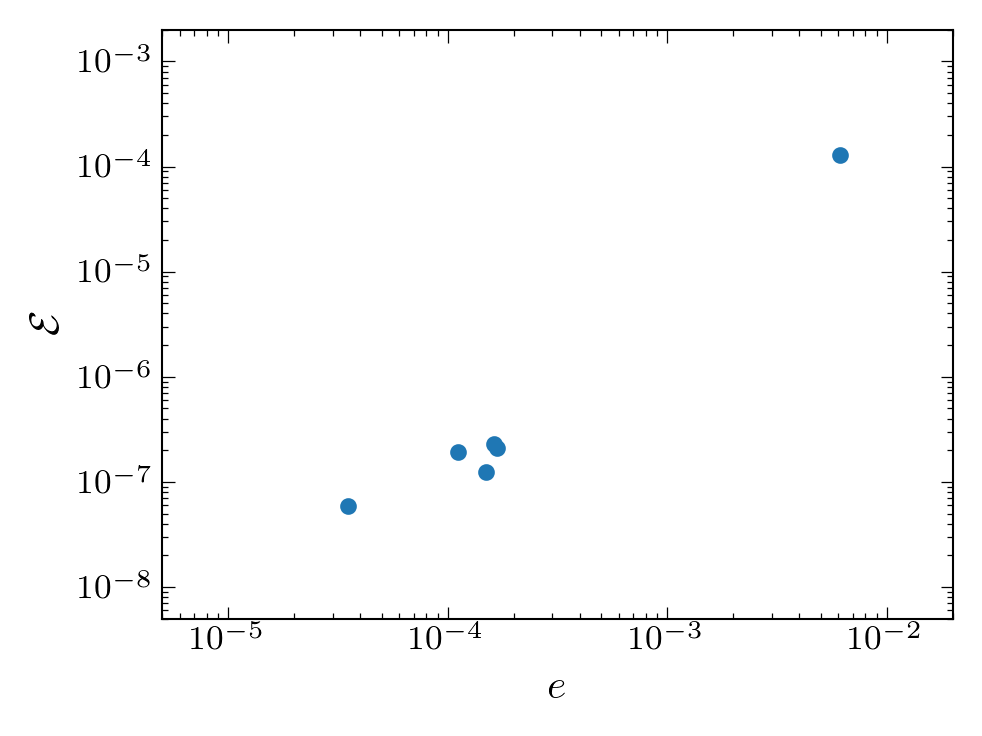

In [10]:
import matplotlib.pyplot as plt
import numpy as np
from scipy import stats
plt.style.use('paper.mplstyle')
ecc=np.array([1.63172953e-04,8.29267955e-06,1.00737401e-05,-4.85269627e-06,-3.29620492e-05,0.00612052])
epsilon=np.array([2.27322489e-07,1.90721845e-07,1.24782689e-07,2.11865317e-07,5.94450151e-08,0.00012922499940618484])
ecc=np.array([1.63172953e-04,1.11023847e-4,1.51583953e-4,1.68083627e-4,3.50164221e-05,0.00612052])
epsilon=np.array([2.27322489e-07,1.90721845e-07,1.24782689e-07,2.11865317e-07,5.94450151e-08,0.00012922499940618484])
res = stats.linregress(np.log10(abs(ecc)), np.log10(epsilon))
print(res)
fig, ax1 = plt.subplots(1,1)
ax1.plot(abs(ecc), epsilon,marker='o',markersize=3,linestyle='none')
#ax1.plot(abs(ecc), 10.0**(res.intercept + res.slope*np.log10(epsilon)), label='slope = 13.0')
#ax1.legend(bbox_to_anchor=(0, 1.02, 1, 0.2), loc="lower left",
#                mode="expand", borderaxespad=0)
x=np.sort(np.array([5e-6,1.63172953e-04,8.29267955e-06,1.00737401e-05,-4.85269627e-06,-3.29620492e-05,0.00612052,2e-2]))
#ax1.plot(x,20*x**2,linestyle='dotted',label=r'$\mathrm{coeff}\times e^2$')
#ax1.legend()
ax1.set_yscale('log')
ax1.set_xscale('log')
ax1.set_ylabel(r'$\mathcal{E}$')
ax1.set_xlabel(r'$e$')
ax1.set_ylim((5e-9,2e-3))
ax1.set_xlim((5e-6,2e-2))
#plt.rcParams.update({'font.size': 14})
#plt.grid()
fig.savefig("EpsilonE.pdf",bbox_inches='tight')

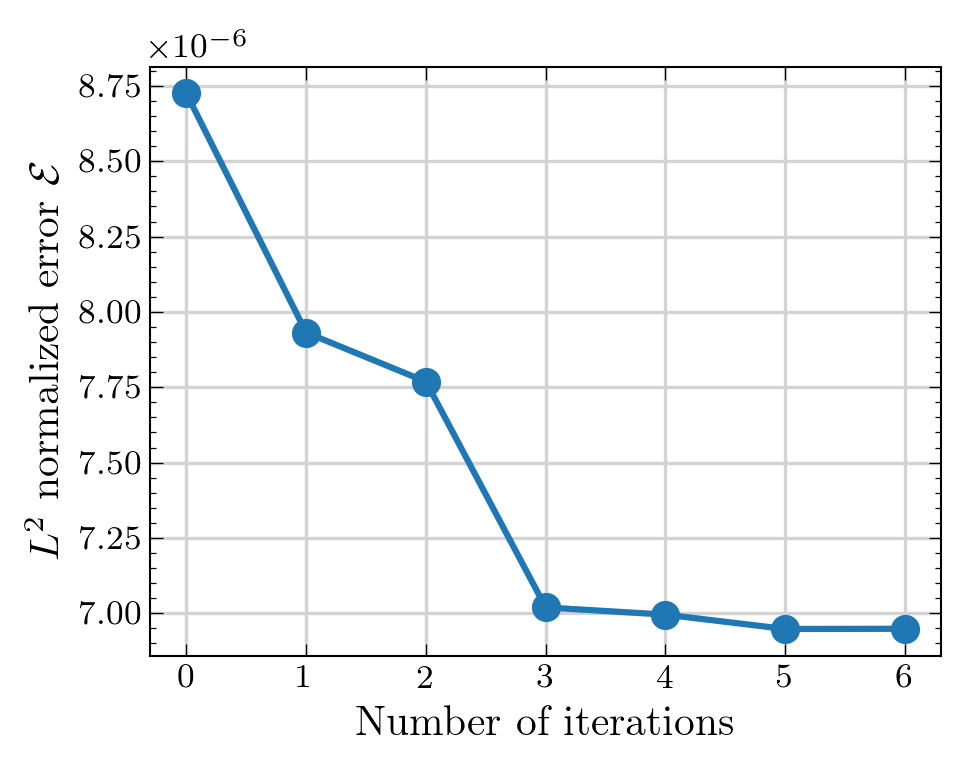

In [2]:
import matplotlib.pyplot as plt
plt.style.use('paper.mplstyle')
#plt.rcParams.update({'font.size': 14})
fig, ax1 = plt.subplots(1,1)
ax1.plot([0,1,2,3,4,5,6],[8.72501929072289e-06,7.931592237331309e-06,7.768558781928725e-06,7.019277491138176e-06,6.995337324844364e-06,6.947757038577862e-06,6.948410494533874e-06],marker='o')
#ax1.title("Fixing PN parameters and BMS frame convergence test")
ax1.set_ylabel(r'$L^2$'+' normalized error '+r'$\mathcal{E}$')
ax1.set_xlabel("Number of iterations")
plt.grid()
fig.savefig("IterConverge.pdf")
#plt.clf()

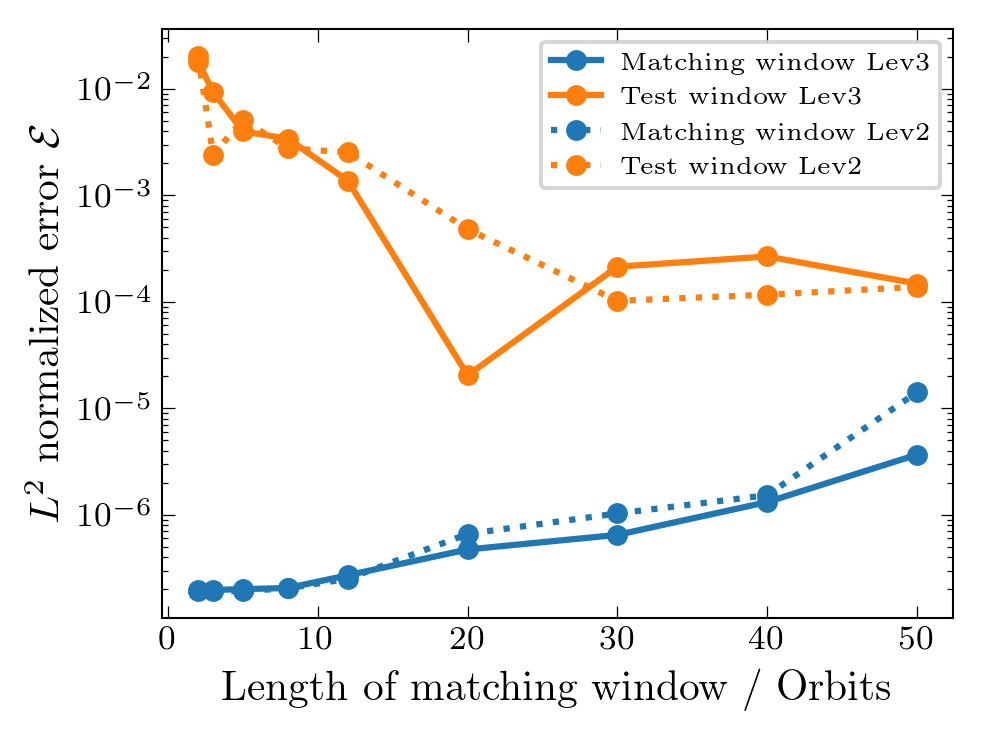

In [5]:
import matplotlib.pyplot as plt
import numpy as np
#plt.rcParams.update({'font.size': 14})
plt.style.use('paper.mplstyle')
x=np.array([2,3,5,8,12,20,30,40,50])
In=np.array([3.29317427e-07,3.03047431e-07,2.02212118e-07,2.14872907e-07,2.47230542e-07,4.17590659e-07,6.71058332e-07,1.29091051e-06,4.93977695e-06])
Out=np.array([ 5.96109291e-02,8.66578600e-03,2.46544483e-03,1.28781207e-03,6.41109647e-04,1.04863968e-05,2.80950335e-05,6.64546569e-05,3.66103370e-05])
#InL2=np.array([2.55132090e-07,1.93987747e-07,1.92516285e-07,2.31892789e-07,2.52200442e-07,6.00936198e-07,1.47456522e-06,4.06166879e-06,1.35490641e-05])
OutL2=np.array([2.04005201e-02,2.41765086e-03,5.13719545e-03,2.75658608e-03,2.53966521e-03,4.80698582e-04,1.02231761e-04,1.16634167e-04,1.38209009e-04])
In=np.array([1.91102623e-07,1.97287117e-07,2.00538496e-07,2.05634083e-07,2.70826232e-07,4.72888265e-07,6.48001136e-07,1.31728646e-06,3.66743411e-06])
Out=np.array([0.018033314235320966,0.009302005741469515,0.003986792953936645,0.003404270793891927,
              0.0013698816134178273,2.0386285304166683e-05,0.00021384254918566646,0.0002666777189236833,0.0001486041971529092])
InL2=np.array([1.94965905e-07,1.91854240e-07,1.92520396e-07,2.04360485e-07,2.50814255e-07,6.61385815e-07,1.02966732e-06,1.52698774e-06,1.41029749e-05])
#OutL2=np.array([0.003318083108885188,0.003118381880295496,0.007485019412911895,0.006270426541109706,
#                0.0050626663709786085,0.0006426647063640084,0.0001792583836326176,0.0017242032388155343,0.0011550767347159154])
fig, ax1 = plt.subplots(1,1)
ax1.plot(x,In,marker='o',markersize=4,label='Matching window Lev3')
ax1.plot(x,Out,marker='o',markersize=4,label='Test window Lev3')
ax1.plot(x,InL2,marker='o',markersize=4,label='Matching window Lev2',linestyle='dotted',color='#1f77b4')
ax1.plot(x,OutL2,marker='o',markersize=4,label='Test window Lev2',linestyle='dotted',color='#ff7f0e')
ax1.legend()
ax1.set_yscale('log')
ax1.set_ylabel(r'$L^2$'+' normalized error '+r'$\mathcal{E}$')
ax1.set_xlabel('Length of matching window / Orbits')
fig.savefig("WindowLength.pdf",bbox_inches='tight')

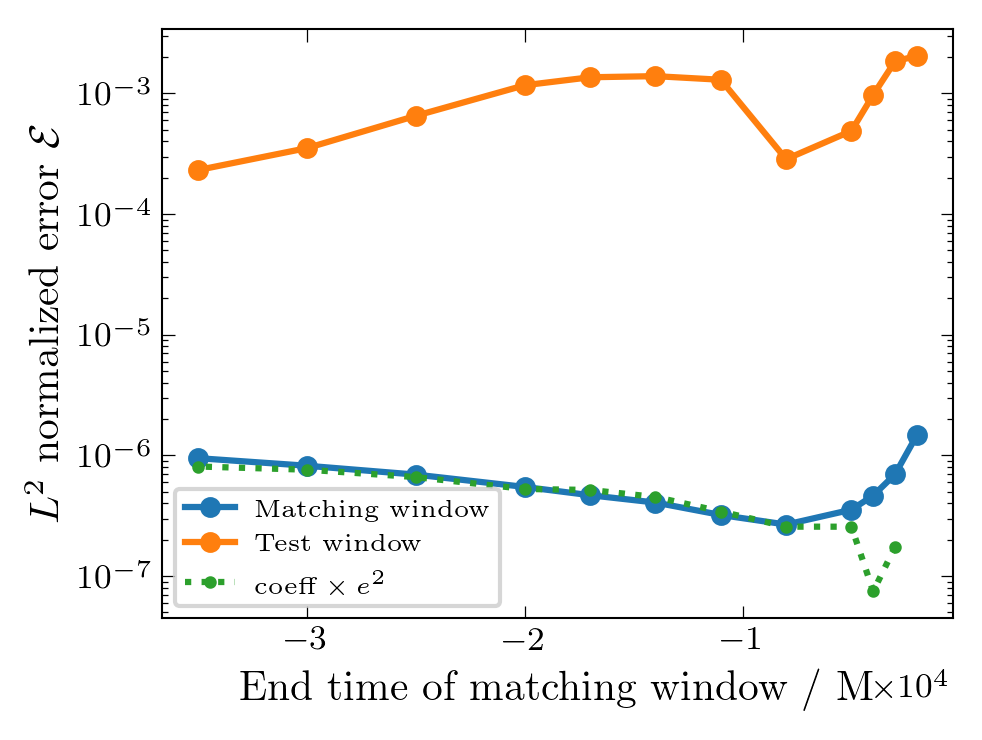

In [8]:
import matplotlib.pyplot as plt
import numpy as np
import scri
from gw_eccentricity import measure_eccentricity
from gw_eccentricity import get_available_methods
from gw_eccentricity.plot_settings import use_fancy_plotsettings, labelsDict

plt.style.use('paper.mplstyle')
#plt.rcParams.update({'font.size': 14})
x=-1000.0*np.array([1,2,3,4,5,8,11,14,17,20,25,30,35])
In=np.array([3.98125781e-06,1.52073492e-06,8.35801794e-07,5.69896730e-07,4.17826081e-07,4.14529574e-07,4.91926920e-07,6.47373360e-07,7.82428770e-07,9.23518672e-07,1.11260500e-06,1.31310950e-06,1.51965658e-06])
Out=np.array([6.54327515e-04,3.10796338e-04,7.85772194e-05,6.03312568e-06,1.06100575e-05,1.69486365e-04,5.80787411e-04,7.48990182e-04,7.03836160e-04,5.64951026e-04,3.76311584e-04,2.26018859e-04,1.11726725e-04])
#In=np.array([3.08464204e-06,8.23911573e-07,3.76661020e-07,2.77837291e-07,2.31376773e-07,2.06147141e-07,2.33061983e-07,2.68897224e-07,3.03678932e-07,3.49088061e-07, 4.98748690e-07,4.97794811e-07,5e-7])
#Out=np.array([0.02206550092286672,0.010585148145783107,0.005857030856959076,0.0028588610938947955,0.0014628449151431499,0.00017624618695981126,0.0007736780332727704,0.0013526639322300829,0.0010565880788316892,0.001002161190746892,0.0005670823649861351,0.00047518751135840334])
#PN=np.array([6.98229489e-08, 6.23934944e-08, 5.45707328e-08, 4.63510113e-08,4.11064027e-08, 3.55305847e-08, 2.97430261e-08, 2.34115397e-08,1.64427592e-08, 1.38372888e-08, 1.11358310e-08, 8.10312863e-09,4.61885556e-09])
In=np.array([4.18110133e-06,1.46770934e-06,6.96777846e-07,4.65024234e-07,3.54977105e-07,
             2.67271282e-07,3.20952496e-07,4.06814497e-07,4.67785690e-07,5.47970792e-07,
             6.93255234e-07,8.20997682e-07,9.48642069e-07])
Out=np.array([0.0007825092526597125,0.0020471281924337387,0.001841735695173366,0.0009733549927592104,0.0004891679221567852,
              0.00028504917259990784,0.0012974230294913803, 0.0013900774612038607,0.001360861115785656,0.0011691067249937493,
              0.0006526298684402438,0.0003521842392504492,0.00023173647780138577])
"""
NRFileName='/panfs/ds09/sxs/dzsun/SimAnnex/Public/HybTest/002/Lev3/rhOverM_Asymptotic_GeometricUnits_CoM.h5/Extrapolated_N4.dir'
W1=scri.SpEC.read_from_h5(NRFileName)
t0=-W1.t[np.argmax(np.linalg.norm(W1.data,axis=1))]
W1.t=W1.t+t0
EccTime=np.arange(-80000,0,0.01,dtype=float)
W_Ecc=W1.interpolate(EccTime)
dataDict = {"t": W_Ecc.t,
       "hlm": {(2, 2): W_Ecc.data[:,4]}}
tref_in = x#np.arange(-79000,0,10,dtype=float)
gwecc_dict = measure_eccentricity(tref_in=tref_in,
                          method='AmplitudeFits',
                          dataDict=dataDict,
                          extra_kwargs={"debug": False})
"""
#tref_outEx = gwecc_dict["tref_out"]
#ecc_refEx = gwecc_dict["eccentricity"]
tref_outEx = x[2:]#gwecc_dict["tref_out"]
ecc_refEx = np.array([1.20665020e-04, 7.89052633e-05, 1.46205134e-04, 1.46295107e-04,
 1.69027118e-04, 1.94151635e-04, 2.07623126e-04, 2.09568242e-04,
 2.34756943e-04, 2.51896410e-04, 2.59688743e-04])#gwecc_dict["eccentricity"]

fig, ax1 = plt.subplots(1,1)
ax1.plot(x[1:],In[1:],marker='o',markersize=4,label='Matching window')
ax1.plot(x[1:],Out[1:],marker='o',markersize=4,label='Test window')
ax1.plot(tref_outEx,12*ecc_refEx**2,marker='o',markersize=2,linestyle='dotted',label=r'$\mathrm{coeff}\times e^2$')
ax1.ticklabel_format(style='sci', scilimits=(-1,2), axis='x')
ax1.legend()
ax1.set_yscale('log')
ax1.set_ylabel(r'$L^2$'+' normalized error '+r'$\mathcal{E}$')
ax1.set_xlabel('End time of matching window / M')
fig.savefig("Window.pdf",bbox_inches='tight')

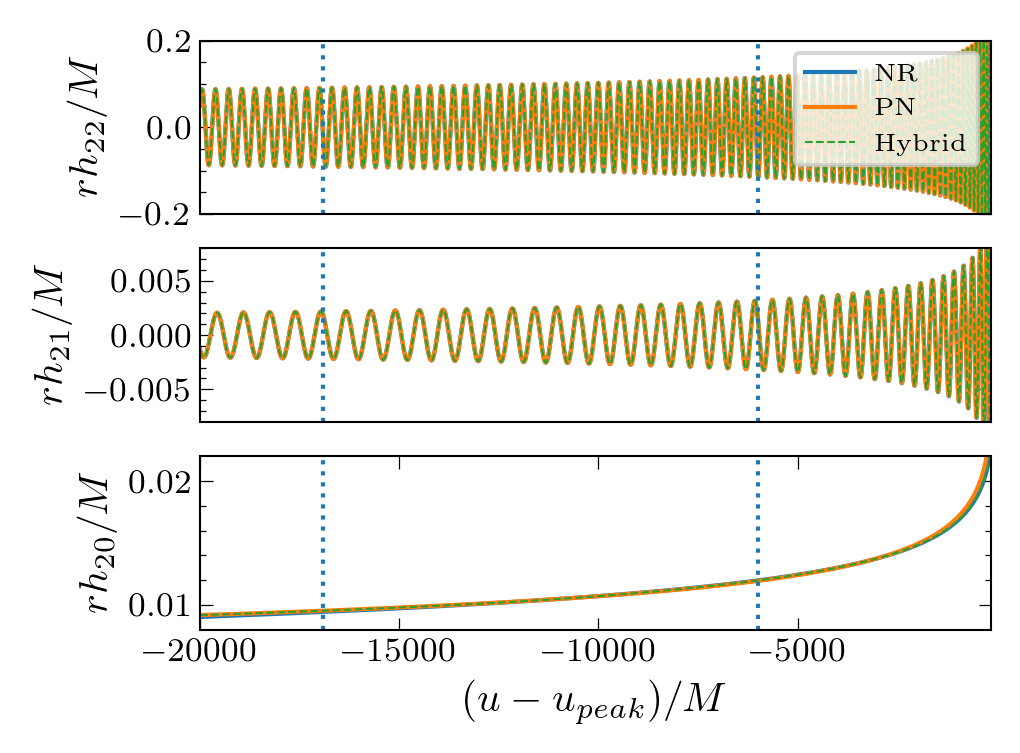

In [7]:
import scri
import matplotlib.pyplot as plt
plt.style.use('paper.mplstyle')
NR='/home/dzsun/Hybrid/HybridizationWaveforms/Out/Out0Iter/rhOverM_hybridNR-16.h5'
W_NR=scri.SpEC.read_from_h5(NR)
PN='/home/dzsun/Hybrid/HybridizationWaveforms/Out/Out0Iter/h_hybridPN-16.h5'
W_PN=scri.SpEC.read_from_h5(PN)
H='/home/dzsun/Hybrid/HybridizationWaveforms/Out/Out0Iter/UnknownDataType_hybridHybrid-16.h5'
W_H=scri.SpEC.read_from_h5(H)

t1,t2,t_start,t_end0 = -20000,-150.0,-16912.695134910766,-6000
fig, (ax1, ax2, ax3) = plt.subplots(3,1)
#plt.rcParams.update({'font.size': 36})
ax1.plot(W_NR.t, W_NR.data[:,4].real-W_NR.data[:,4].imag, label='NR', linewidth=1)
ax1.plot(W_PN.t, W_PN.data[:,4].real-W_PN.data[:,4].imag, label='PN', linewidth=1)
ax1.plot(W_H.t, W_H.data[:,4].real-W_H.data[:,4].imag, ls='--', label='Hybrid', linewidth=0.5)
ax1.set_xlim((t1,t2))
ax1.set_ylim((-0.2,0.2))
ax1.set_ylabel(r'$rh_{22}/M$')
ax1.legend(loc="upper right")
ax1.axvline(t_start, linestyle='dotted', linewidth=1)
ax1.axvline(t_end0, linestyle='dotted', linewidth=1)
ax1.get_xaxis().set_visible(False)

ax2.plot(W_NR.t, W_NR.data[:,3].real-W_NR.data[:,3].imag, label='NR', linewidth=1)
ax2.plot(W_PN.t, W_PN.data[:,3].real-W_PN.data[:,3].imag, label='PN', linewidth=1)
ax2.plot(W_H.t, W_H.data[:,3].real-W_H.data[:,3].imag, ls='--', label='Hybrid', linewidth=0.5)
ax2.set_xlim((t1,t2))
ax2.set_ylim((-0.008,0.008))
ax2.set_ylabel(r'$rh_{21}/M$')
ax2.axvline(t_start, linestyle='dotted', linewidth=1)
ax2.axvline(t_end0, linestyle='dotted', linewidth=1)
ax2.get_xaxis().set_visible(False)

ax3.plot(W_NR.t, W_NR.data[:,2].real-W_NR.data[:,2].imag, label='NR', linewidth=1)
ax3.plot(W_PN.t, W_PN.data[:,2].real-W_PN.data[:,2].imag, label='PN', linewidth=1)
ax3.plot(W_H.t, W_H.data[:,2].real-W_H.data[:,2].imag, ls='--', label='Hybrid', linewidth=0.5)
ax3.set_xlim((t1,t2))
ax3.set_ylim((0.008,0.022))
ax3.set_ylabel(r'$rh_{20}/M$')
ax3.axvline(t_start, linestyle='dotted', linewidth=1)
ax3.axvline(t_end0, linestyle='dotted', linewidth=1)
ax3.set_xlabel(r'$(u-u_{peak})/M$')
fig.savefig("StrainSpinAlign.pdf")

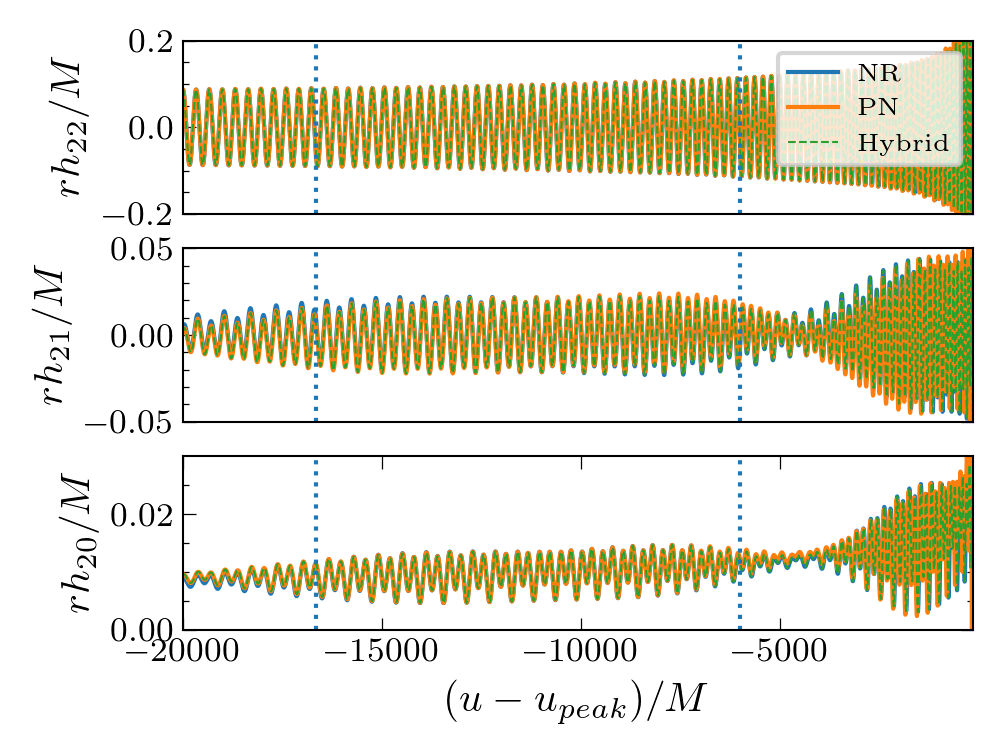

In [2]:
import scri
import matplotlib.pyplot as plt
plt.style.use('paper.mplstyle')
NR='/home/dzsun/Hybrid/HybridizationWaveforms/Out/Out1Iter/rhOverM_hybridNR-16.h5'
W_NR=scri.SpEC.read_from_h5(NR)
PN='/home/dzsun/Hybrid/HybridizationWaveforms/Out/Out1Iter/h_hybridPN-16.h5'
W_PN=scri.SpEC.read_from_h5(PN)
H='/home/dzsun/Hybrid/HybridizationWaveforms/Out/Out1Iter/UnknownDataType_hybridHybrid-16.h5'
W_H=scri.SpEC.read_from_h5(H)

t1,t2,t_start,t_end0 = -20000,-150.0,-16658.8953218312,-6000
fig, (ax1, ax2, ax3) = plt.subplots(3,1)
#plt.rcParams.update({'font.size': 36})
ax1.plot(W_NR.t, W_NR.data[:,4].real-W_NR.data[:,4].imag, label='NR', linewidth=1)
ax1.plot(W_PN.t, W_PN.data[:,4].real-W_PN.data[:,4].imag, label='PN', linewidth=1)
ax1.plot(W_H.t, W_H.data[:,4].real-W_H.data[:,4].imag, ls='--', label='Hybrid', linewidth=0.5)
ax1.set_xlim((t1,t2))
ax1.set_ylim((-0.2,0.2))
ax1.set_ylabel(r'$rh_{22}/M$')
ax1.legend(loc="upper right")
ax1.axvline(t_start, linestyle='dotted', linewidth=1)
ax1.axvline(t_end0, linestyle='dotted', linewidth=1)
ax1.get_xaxis().set_visible(False)

ax2.plot(W_NR.t, W_NR.data[:,3].real-W_NR.data[:,3].imag, label='NR', linewidth=1)
ax2.plot(W_PN.t, W_PN.data[:,3].real-W_PN.data[:,3].imag, label='PN', linewidth=1)
ax2.plot(W_H.t, W_H.data[:,3].real-W_H.data[:,3].imag, ls='--', label='Hybrid', linewidth=0.5)
ax2.set_xlim((t1,t2))
ax2.set_ylim((-0.05,0.05))
ax2.set_ylabel(r'$rh_{21}/M$')
ax2.axvline(t_start, linestyle='dotted', linewidth=1)
ax2.axvline(t_end0, linestyle='dotted', linewidth=1)
ax2.get_xaxis().set_visible(False)

ax3.plot(W_NR.t, W_NR.data[:,2].real-W_NR.data[:,2].imag, label='NR', linewidth=1)
ax3.plot(W_PN.t, W_PN.data[:,2].real-W_PN.data[:,2].imag, label='PN', linewidth=1)
ax3.plot(W_H.t, W_H.data[:,2].real-W_H.data[:,2].imag, ls='--', label='Hybrid', linewidth=0.5)
ax3.set_xlim((t1,t2))
ax3.set_ylim((0.0,0.03))
ax3.set_ylabel(r'$rh_{20}/M$')
ax3.axvline(t_start, linestyle='dotted', linewidth=1)
ax3.axvline(t_end0, linestyle='dotted', linewidth=1)
ax3.set_xlabel(r'$(u-u_{peak})/M$')
fig.savefig("StrainPrecessing.pdf")

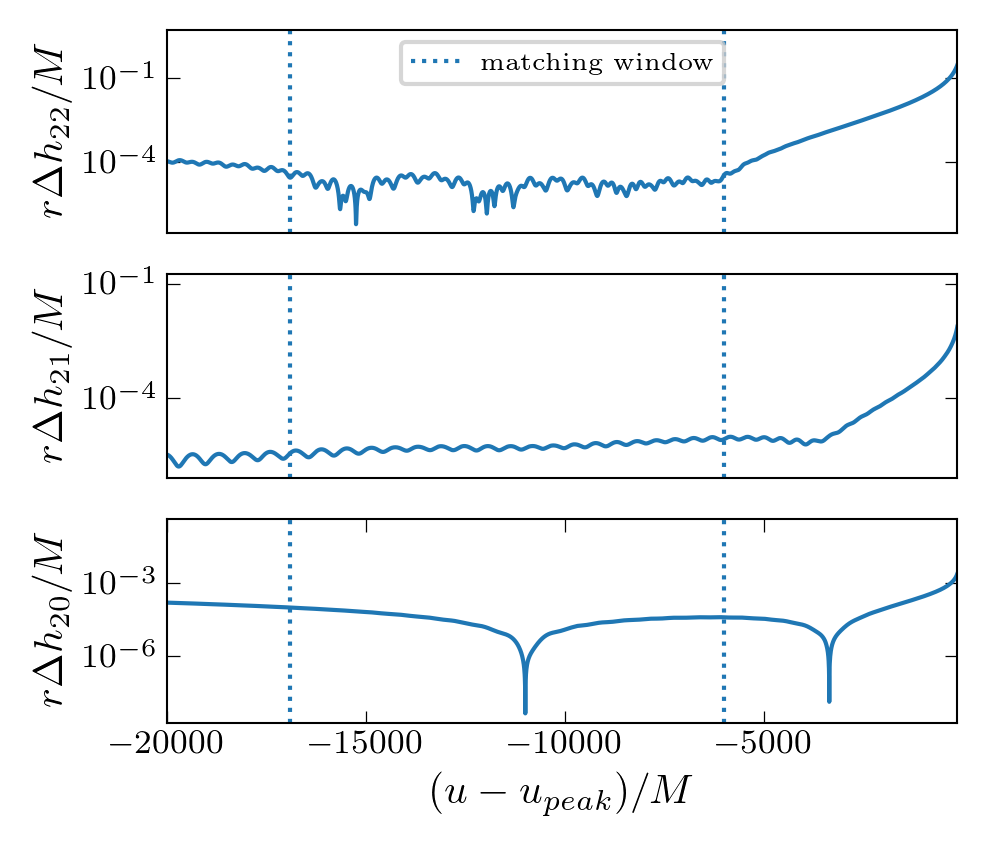

In [27]:
import scri
import matplotlib.pyplot as plt
import numpy as np
plt.style.use('paper.mplstyle')
t=np.genfromtxt('/home/dzsun/Hybrid/HybridizationWaveforms/Out/Out0Iter/hybridCheckResultsErrort005-16.txt')
e22=np.genfromtxt('/home/dzsun/Hybrid/HybridizationWaveforms/Out/Out0Iter/hybridCheckResultsError22005-16.txt')
e21=np.genfromtxt('/home/dzsun/Hybrid/HybridizationWaveforms/Out/Out0Iter/hybridCheckResultsError21005-16.txt')
e20=np.genfromtxt('/home/dzsun/Hybrid/HybridizationWaveforms/Out/Out0Iter/hybridCheckResultsError20005-16.txt')

fig, (ax1, ax2, ax3) = plt.subplots(3,1,figsize=(3.4, 3))
#plt.rcParams.update({'font.size': 36})
ax1.plot(t, e22, linewidth=1)
ax1.set_xlim((t1,t2))
#ax1.set_ylim((5e-6,5e-1))
ax1.set_ylabel(r'$r\Delta h_{22}/M$')
ax1.set_yscale('log')
ax1.axvline(t_start, linestyle='dotted', label='matching window', linewidth=1)
ax1.axvline(t_end0, linestyle='dotted', linewidth=1)
ax1.legend()
ax1.get_xaxis().set_visible(False)

ax2.plot(t, e21, label='NR', linewidth=1)
ax2.set_xlim((t1,t2))
#ax2.set_ylim((-0.05,0.05))
ax2.set_ylabel(r'$r\Delta h_{21}/M$')
ax2.set_yscale('log')
ax2.axvline(t_start, linestyle='dotted', linewidth=1)
ax2.axvline(t_end0, linestyle='dotted', linewidth=1)
ax2.get_xaxis().set_visible(False)

ax3.plot(t, e20, label='NR', linewidth=1)
ax3.set_xlim((t1,t2))
#ax3.set_ylim((0.0,0.03))
ax3.set_ylabel(r'$r\Delta h_{20}/M$')
ax3.set_yscale('log')
ax3.axvline(t_start, linestyle='dotted', linewidth=1)
ax3.axvline(t_end0, linestyle='dotted', linewidth=1)
ax3.set_xlabel(r'$(u-u_{peak})/M$')
fig.savefig("ErrorSpinAlign.pdf")

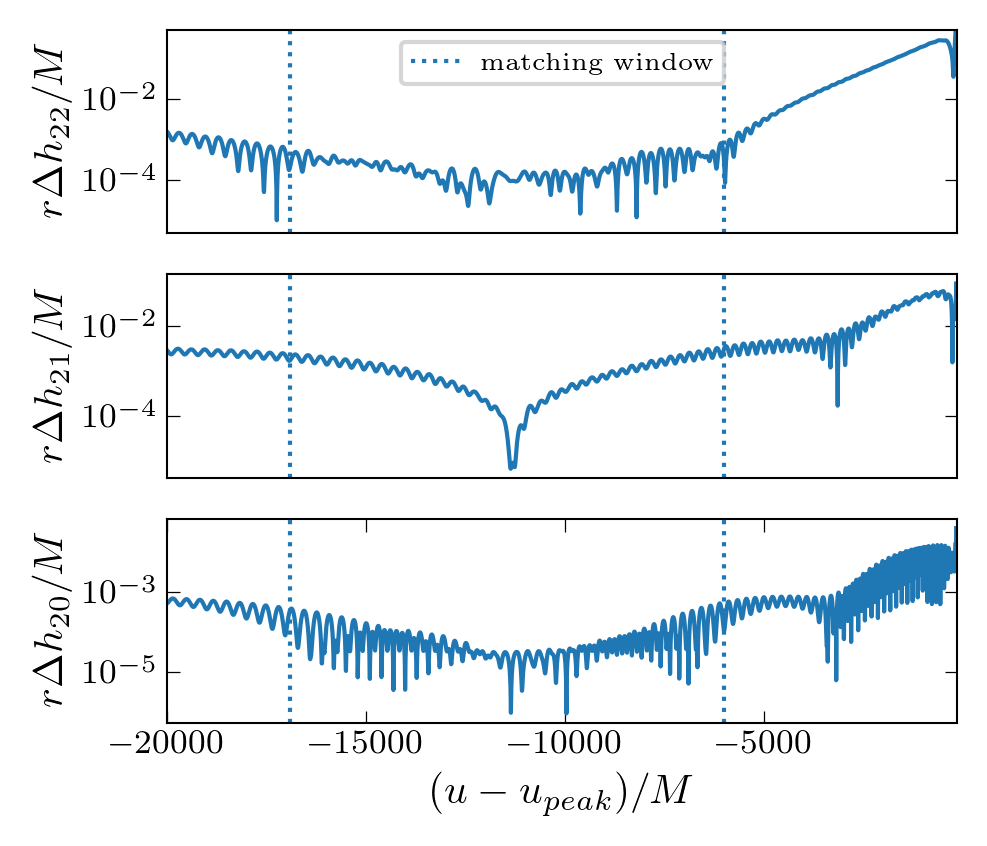

In [26]:
import scri
import matplotlib.pyplot as plt
import numpy as np
plt.style.use('paper.mplstyle')
t=np.genfromtxt('/home/dzsun/Hybrid/HybridizationWaveforms/Out/Out1Iter/hybridCheckResultsErrort008-16.txt')
e22=np.genfromtxt('/home/dzsun/Hybrid/HybridizationWaveforms/Out/Out1Iter/hybridCheckResultsError22008-16.txt')
e21=np.genfromtxt('/home/dzsun/Hybrid/HybridizationWaveforms/Out/Out1Iter/hybridCheckResultsError21008-16.txt')
e20=np.genfromtxt('/home/dzsun/Hybrid/HybridizationWaveforms/Out/Out1Iter/hybridCheckResultsError20008-16.txt')

fig, (ax1, ax2, ax3) = plt.subplots(3,1,figsize=(3.4, 3))
#plt.rcParams.update({'font.size': 36})
ax1.semilogy(t, e22, linewidth=1)
ax1.set_xlim((t1,t2))
ax1.set_ylim((5e-6,5e-1))
ax1.set_ylabel(r'$r\Delta h_{22}/M$')
ax1.set_yscale('log')
ax1.axvline(t_start, linestyle='dotted', label='matching window', linewidth=1)
ax1.axvline(t_end0, linestyle='dotted', linewidth=1)
ax1.legend(loc=9)
ax1.get_xaxis().set_visible(False)

ax2.plot(t, e21, label='NR', linewidth=1)
ax2.set_xlim((t1,t2))
#ax2.set_ylim((-0.05,0.05))
ax2.set_ylabel(r'$r\Delta h_{21}/M$')
ax2.set_yscale('log')
ax2.axvline(t_start, linestyle='dotted', linewidth=1)
ax2.axvline(t_end0, linestyle='dotted', linewidth=1)
ax2.get_xaxis().set_visible(False)

ax3.plot(t, e20, label='NR', linewidth=1)
ax3.set_xlim((t1,t2))
#ax3.set_ylim((0.0,0.03))
ax3.set_ylabel(r'$r\Delta h_{20}/M$')
ax3.set_yscale('log')
ax3.axvline(t_start, linestyle='dotted', linewidth=1)
ax3.axvline(t_end0, linestyle='dotted', linewidth=1)
ax3.set_xlabel(r'$(u-u_{peak})/M$')
fig.savefig("ErrorPrecessing.pdf")

/home/dzsun/Hybrid/HybridizationWaveforms/PYPostNewtonian/Code/PNEvolution.py:1983: RuntimeWarning: invalid value encountered in power
  while time[-1]<TEnd and 2*PNEv.Cons.M*(256*PNEv.Cons.nu*(TMerger-time[-1])/5)**(3/8)/StepsPerOrbit>MinStep:
/home/dzsun/Hybrid/HybridizationWaveforms/PYPostNewtonian/Code/PNEvolution.py:1764: NumbaPerformanceWarning: np.dot() is faster on contiguous arrays, called on (array(float64, 1d, A), array(float64, 1d, A))
  Vars.chi1_n = np.array([dot(Vars.chiVec1[1:],Vars.nHat[1:])])
/home/dzsun/Hybrid/HybridizationWaveforms/PYPostNewtonian/Code/PNEvolution.py:1764: NumbaPerformanceWarning: np.dot() is faster on contiguous arrays, called on (array(float64, 1d, A), array(float64, 1d, A))
  Vars.chi1_n = np.array([dot(Vars.chiVec1[1:],Vars.nHat[1:])])


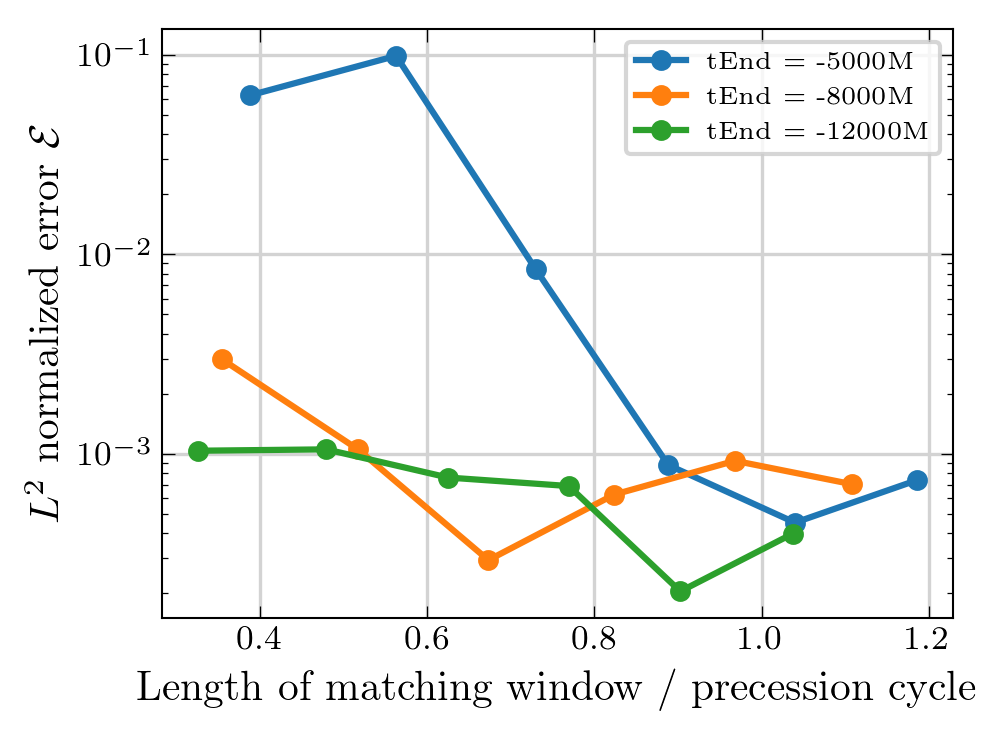

In [38]:
import matplotlib.pyplot as plt
import numpy as np
from PYPostNewtonian.Code import PostNewtonian
import quaternion
import scri
from scipy.integrate import simpson

def nOrbits_to_length(nOrbits, t_end, Omega_array, time_array):
    tol=1e-2
    number=0
    a=time_array[0]
    b=t_end
    t0=(a+b)/2
    orbits=simpson(Omega_array[(time_array>t0)&(time_array<t_end)],
        time_array[(time_array>t0)&(time_array<t_end)])/2/np.pi
    while abs(orbits-nOrbits)>tol and number<=100:
        orbits=simpson(Omega_array[(time_array>t0)&(time_array<t_end)],
        time_array[(time_array>t0)&(time_array<t_end)])/2/np.pi
        if orbits<nOrbits:
            b=t0
        else:
            a=t0
        t0=(a+b)/2
        number+=1
    if number>100:
        message=("The waveform before endtime only has {0} orbits, which is smaller than required {1}.")
        raise ValueError(message.format(orbits, nOrbits))
    return t0

M=1.00957589
W_PN=PostNewtonian.PNWaveform(1.66101059, 0.009135379203025925*M, [-3.86811758e-01, -5.37579977e-02,-1.30710820e-01], [1.48337511e-01, -3.54572665e-01,  2.87396535e-01], t_0=-21735.788794586213/M, t_PNStart=-100000.0, t_PNEnd=25000.0)
W_PN.t=W_PN.t*M
omega1=(W_PN.copy()).angular_velocity()
omega2=((W_PN.copy()).to_coprecessing_frame()).angular_velocity()
omega=omega1-omega2
omega_mag1 = np.linalg.norm(omega1, axis=1)
omega_mag = np.linalg.norm(omega1, axis=1)
plt.style.use('paper.mplstyle')
#-5000
x=np.array([10.0,15.0,20.0,25.0,30.0,35.0])
coeff=0.68098243
power=5/3
#plt.plot(W_PN.t,W_PN.data[:,3])

x05=x.copy()
for i in range(6):
    t_end = -5000.0
    t_s = nOrbits_to_length(x[i], t_end, omega_mag1, W_PN.t)
    x05[i] = simpson(coeff*(omega_mag[(W_PN.t>t_s)&(W_PN.t<t_end)])**(power),
        W_PN.t[(W_PN.t>t_s)&(W_PN.t<t_end)])/2/np.pi
x08=x.copy()
for i in range(6):
    t_end = -8000.0
    t_s = nOrbits_to_length(x[i], t_end, omega_mag1, W_PN.t)
    x08[i] = simpson(coeff*(omega_mag[(W_PN.t>t_s)&(W_PN.t<t_end)])**(power),
        W_PN.t[(W_PN.t>t_s)&(W_PN.t<t_end)])/2/np.pi
x12=x.copy()
for i in range(6):
    t_end = -12000.0
    t_s = nOrbits_to_length(x[i], t_end, omega_mag1, W_PN.t)
    x12[i] = simpson(coeff*(omega_mag[(W_PN.t>t_s)&(W_PN.t<t_end)])**(power),
        W_PN.t[(W_PN.t>t_s)&(W_PN.t<t_end)])/2/np.pi
x20=x.copy()
for i in range(6):
    t_end = -20000.0
    t_s = nOrbits_to_length(x[i], t_end, omega_mag1, W_PN.t)
    x20[i] = simpson(coeff*(omega_mag[(W_PN.t>t_s)&(W_PN.t<t_end)])**(power),
        W_PN.t[(W_PN.t>t_s)&(W_PN.t<t_end)])/2/np.pi

S5=np.array([0.0628135941051316,0.099006920713536,0.008405197664676187,0.0008770155930728468,0.00045088831622190195,0.0007358006038176101])
S8=np.array([0.0029702512641887027,0.001049618985918063,0.00029234053621623915,0.000623454435813241,0.0009208361760391787,0.0007035109203687698])
S5ExNo=np.array([0.011768773740308843,0.009039997183619317,0.008066665691688462,0.007104891859696871,0.005952431730865369,0.005478752555032064])
S5Ex=np.array([0.05753731476366461,0.00759659414113879,0.014403074354957862,0.004781574128113974,0.0038247746989025335,0.0037561829365789475])
S8ExNo=np.array([0.0066747718818266815,0.005501822927805749,0.005711364542270006,0.006042892016014051,0.005266403195087006,0.005578310662756168])
S8Ex=np.array([0.04355267519963412,0.009780979210311859,0.0043655550972645915,0.004478630327711934,0.003980152830442496,0.0042063306498738755])
S12=np.array([0.001034567054436185,0.0010509582268236927,0.0007589426531263763,0.0006880184390854162,0.0002038051502290654,0.00039737010607782195])
S20=np.array([0.0006225342172481107,0.0010368446923636886,0.001659104839235284,0.001998627882891993,0.0016502708196250318,0.0014137406912522082])
fig1, (ax1) = plt.subplots(1,1)
ax1.plot(x05,S5,marker='o',markersize=4, label='tEnd = -5000M')
ax1.plot(x08,S8,marker='o',markersize=4, label='tEnd = -8000M')#**2.0/4.68655259e-01**2.0
#ax1.plot(x05,S5ExNo,marker='o',markersize=4, label='extrapolated, no optimization',linestyle='dotted', color='#1f77b4')#**2.0/4.68655259e-01**2.0
#ax1.plot(x08,S8ExNo,marker='o',markersize=4, label='extrapolated, no optimization',linestyle='dotted', color='#ff7f0e')#**2.0/4.68655259e-01**2.0
#ax1.plot(x05,S5Ex,marker='',markersize=4, label='extrapolated, fix PN',linestyle='dotted', color='#1f77b4')#**2.0/4.68655259e-01**2.0
#ax1.plot(x08,S8Ex,marker='',markersize=4, label='extrapolated, fix PN',linestyle='dotted', color='#ff7f0e')#**2.0/4.68655259e-01**2.0
ax1.plot(x12,S12,marker='o',markersize=4, label='tEnd = -12000M')#**2.0/4.70371470e-01**2.0
#ax1.plot(x20,S20,marker='o',markersize=4, label='tEnd = -20000M')#**2.0/2.39607164e-01**2.0
ax1.legend()
ax1.set_yscale('log')
ax1.set_ylabel(r'$L^2$'+' normalized error '+r'$\mathcal{E}$')
ax1.set_xlabel("Length of matching window / precession cycle")
plt.grid()
#plt.rcParams.update({'font.size': 14})
fig1.savefig("WindowPre.pdf", bbox_inches = 'tight')

/home/dzsun/Hybrid/HybridizationWaveforms/PYPostNewtonian/Code/PNEvolution.py:1983: RuntimeWarning: invalid value encountered in power
  while time[-1]<TEnd and 2*PNEv.Cons.M*(256*PNEv.Cons.nu*(TMerger-time[-1])/5)**(3/8)/StepsPerOrbit>MinStep:


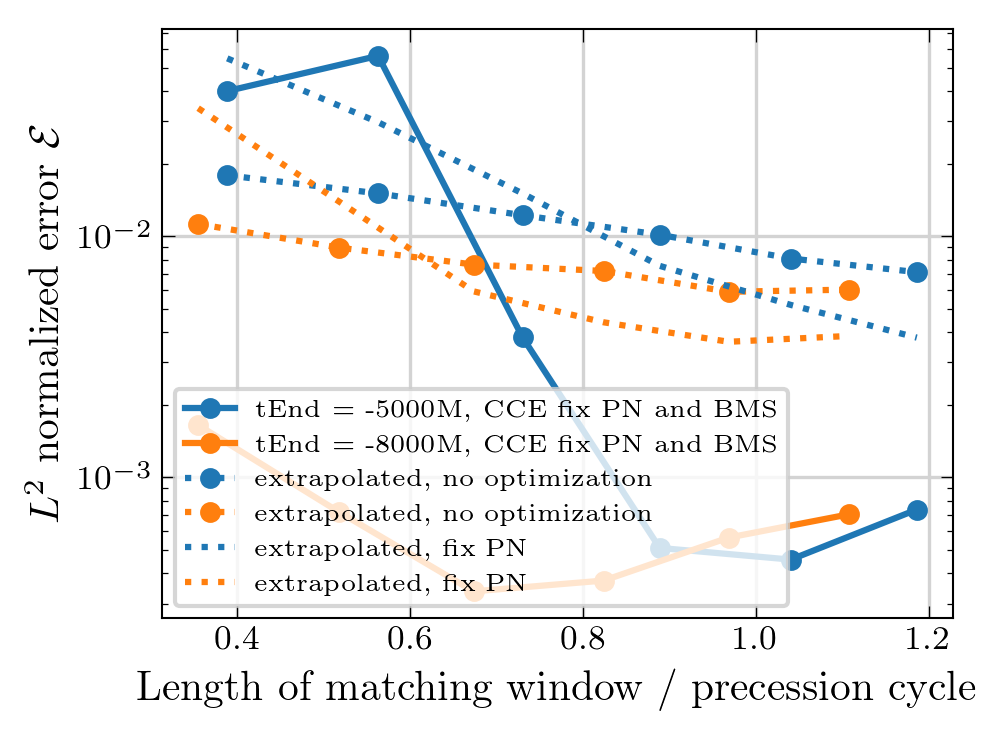

In [2]:
import matplotlib.pyplot as plt
import numpy as np
from PYPostNewtonian.Code import PostNewtonian
import quaternion
import scri
from scipy.integrate import simpson

def nOrbits_to_length(nOrbits, t_end, Omega_array, time_array):
    tol=1e-2
    number=0
    a=time_array[0]
    b=t_end
    t0=(a+b)/2
    orbits=simpson(Omega_array[(time_array>t0)&(time_array<t_end)],
        time_array[(time_array>t0)&(time_array<t_end)])/2/np.pi
    while abs(orbits-nOrbits)>tol and number<=100:
        orbits=simpson(Omega_array[(time_array>t0)&(time_array<t_end)],
        time_array[(time_array>t0)&(time_array<t_end)])/2/np.pi
        if orbits<nOrbits:
            b=t0
        else:
            a=t0
        t0=(a+b)/2
        number+=1
    if number>100:
        message=("The waveform before endtime only has {0} orbits, which is smaller than required {1}.")
        raise ValueError(message.format(orbits, nOrbits))
    return t0

M=1.00957589
W_PN=PostNewtonian.PNWaveform(1.66101059, 0.009135379203025925*M, [-3.86811758e-01, -5.37579977e-02,-1.30710820e-01], [1.48337511e-01, -3.54572665e-01,  2.87396535e-01], t_0=-21735.788794586213/M, t_PNStart=-100000.0, t_PNEnd=25000.0)
W_PN.t=W_PN.t*M
omega=W_PN.angular_velocity()
omega_mag = np.linalg.norm(omega, axis=1)
plt.style.use('paper.mplstyle')
#-5000
x=np.array([10.0,15.0,20.0,25.0,30.0,35.0])
coeff=0.68098243
#plt.plot(W_PN.t,W_PN.data[:,3])

x05=x.copy()
for i in range(6):
    t_end = -5000.0
    t_s = nOrbits_to_length(x[i], t_end, omega_mag, W_PN.t)
    x05[i] = simpson(coeff*(omega_mag[(W_PN.t>t_s)&(W_PN.t<t_end)])**(5/3),
        W_PN.t[(W_PN.t>t_s)&(W_PN.t<t_end)])/2/np.pi
x08=x.copy()
for i in range(6):
    t_end = -8000.0
    t_s = nOrbits_to_length(x[i], t_end, omega_mag, W_PN.t)
    x08[i] = simpson(coeff*(omega_mag[(W_PN.t>t_s)&(W_PN.t<t_end)])**(5/3),
        W_PN.t[(W_PN.t>t_s)&(W_PN.t<t_end)])/2/np.pi
x12=x.copy()
for i in range(6):
    t_end = -12000.0
    t_s = nOrbits_to_length(x[i], t_end, omega_mag, W_PN.t)
    x12[i] = simpson(coeff*(omega_mag[(W_PN.t>t_s)&(W_PN.t<t_end)])**(5/3),
        W_PN.t[(W_PN.t>t_s)&(W_PN.t<t_end)])/2/np.pi
x20=x.copy()
for i in range(6):
    t_end = -20000.0
    t_s = nOrbits_to_length(x[i], t_end, omega_mag, W_PN.t)
    x20[i] = simpson(coeff*(omega_mag[(W_PN.t>t_s)&(W_PN.t<t_end)])**(5/3),
        W_PN.t[(W_PN.t>t_s)&(W_PN.t<t_end)])/2/np.pi

S5=np.array([0.04005379650694705,0.05606241134419753,0.00380681098941024,0.0005100083462534481,0.0004563131469656637,0.0007358006038176101])
S8=np.array([0.0016496728382470699,0.0007199656217175839,0.00033687746606776096,0.0003735076403558694,0.0005630407618327319,0.0007035109203687698])
S5ExNo=np.array([0.017909407041812677,0.015076642274998546,0.012232295805832677,0.010155970170651328,0.008092071378294957,0.007106617435130905])
S5Ex=np.array([0.054735747812068074,0.029746327176187984,0.0150628292059025,0.007546653660700997,0.005194881162036578,0.0038015617404659066])
S8ExNo=np.array([0.011249686458499874,0.00898098483585554,0.007639664514657252,0.007183018342036205,0.005889820724289424, 0.006012888941852184])
S8Ex=np.array([0.03400572035584425,0.013959441689164987,0.005913898421329967,0.004400102728725198,0.003653457340068396,0.0038635950615733767])
S12=np.array([0.0033735329836814586,0.0031834699811071356,0.0019232708651993184,0.0022174662065494637,0.0005688205936621014,0.00058165667565969])
S20=np.array([0.0007861270514784714,0.0007382451518745229,0.0016805382032502136,0.002541659335232283,0.0017007445210565797,0.0013734189179918407])
fig1, (ax1) = plt.subplots(1,1)
ax1.plot(x05,S5,marker='o',markersize=4, label='tEnd = -5000M, CCE fix PN and BMS')
ax1.plot(x08,S8,marker='o',markersize=4, label='tEnd = -8000M, CCE fix PN and BMS')#**2.0/4.68655259e-01**2.0
ax1.plot(x05,S5ExNo,marker='o',markersize=4, label='extrapolated, no optimization',linestyle='dotted', color='#1f77b4')#**2.0/4.68655259e-01**2.0
ax1.plot(x08,S8ExNo,marker='o',markersize=4, label='extrapolated, no optimization',linestyle='dotted', color='#ff7f0e')#**2.0/4.68655259e-01**2.0
ax1.plot(x05,S5Ex,marker='',markersize=4, label='extrapolated, fix PN',linestyle='dotted', color='#1f77b4')#**2.0/4.68655259e-01**2.0
ax1.plot(x08,S8Ex,marker='',markersize=4, label='extrapolated, fix PN',linestyle='dotted', color='#ff7f0e')#**2.0/4.68655259e-01**2.0
#ax1.plot(x12,S12,marker='o',markersize=4, label='tEnd = -12000M')#**2.0/4.70371470e-01**2.0
#ax1.plot(x20,S20,marker='o',markersize=4, label='tEnd = -20000M')#**2.0/2.39607164e-01**2.0
ax1.legend()
ax1.set_yscale('log')
ax1.set_ylabel(r'$L^2$'+' normalized error '+r'$\mathcal{E}$')
ax1.set_xlabel("Length of matching window / precession cycle")
plt.grid()

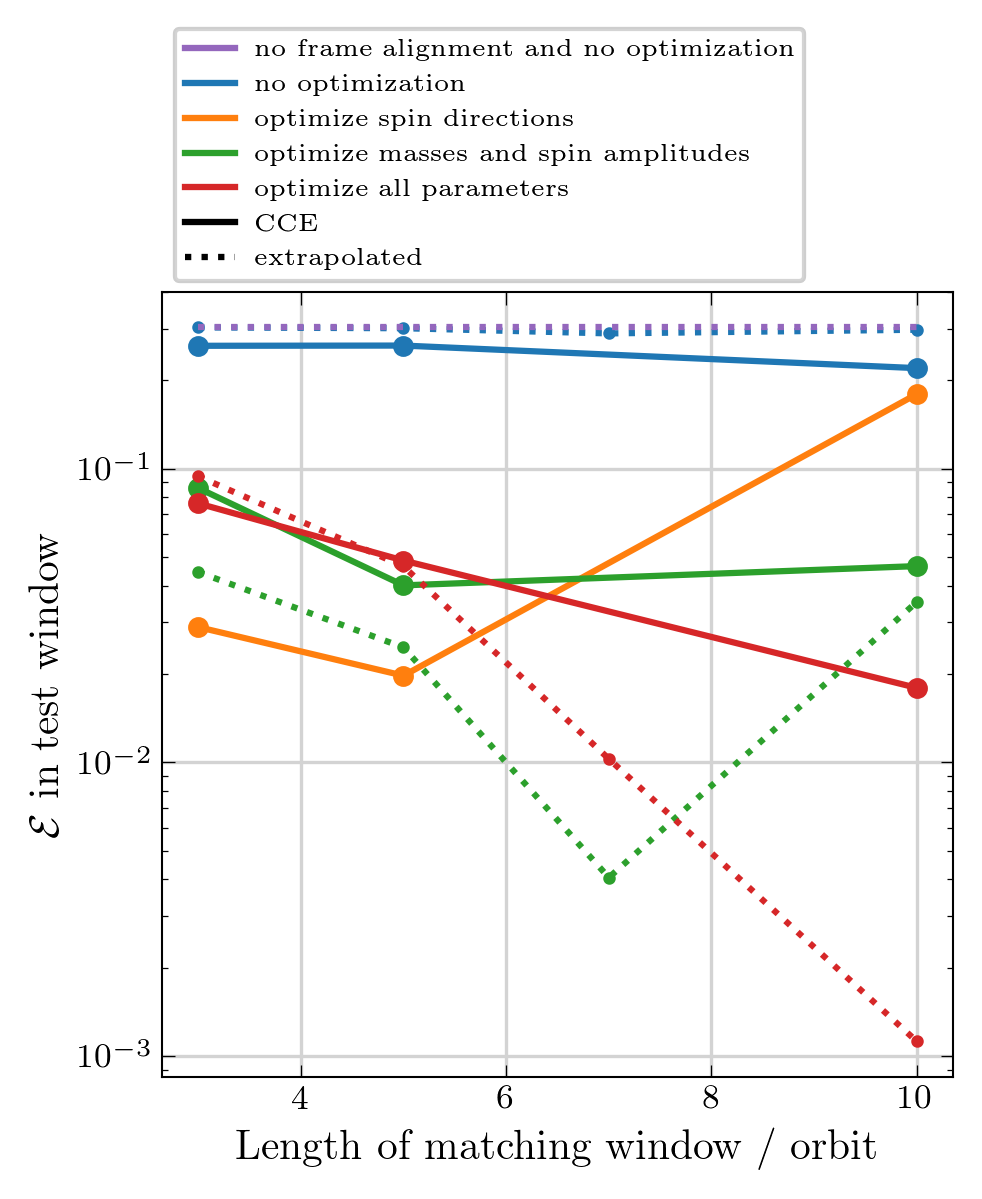

In [6]:
import matplotlib.pyplot as plt
from matplotlib.transforms import Bbox
import numpy as np
plt.style.use('paper.mplstyle')
x=np.array([3,5,7,10])
x1=np.array([3,5,10])
y1=np.array([0.2621356030351585,0.2626176121923877,0.22003601597871783])
y1E=np.array([0.3027095410535815,0.3008522590862863,0.28890594238335243,0.2973213461104681])
y2=np.array([0.028899657453002995,0.01974518878412767, 0.1794994245652202])
#y2E=np.array([
y4=np.array([0.07621109338776434,0.048688189829946896,0.01794584150635428])
y4E=np.array([0.09424105125877118,0.04653723390284985,0.010286425807843775,0.0011227253370711917])
y6=np.array([0.08596346650196798,0.040081166115137686,0.04661302334722747])
y6E=np.array([0.04447419769191343,0.02464292162632057,0.004055276561450297,0.035192911142406406])
fig1, (ax1) = plt.subplots(1,1)
ax1.plot(x1,y1,marker='o',markersize=4, label='no ptimization')
ax1.plot(x1,y2,marker='o',markersize=4, label='optimize spin directions')
ax1.plot(x1,y6,marker='o',markersize=4, label='optimize masses and spin amplitudes')
ax1.plot(x1,y4,marker='o',markersize=4, label='optimize all parameters')
ax1.plot(x,y1E,marker='o',markersize=2, color='#1f77b4',linestyle='dotted')
ax1.plot(x,y6E,marker='o',markersize=2, color='#2ca02c',linestyle='dotted')
ax1.plot(x,y4E,marker='o',markersize=2, color='#d62728',linestyle='dotted')
ax1.plot(x,0.3027095410535815*np.ones(4), linestyle='dotted')
#ax1.plot(x,y4E,marker='o',markersize=4, label='optimize all parameters',color='#d62728',linestyle='dotted')
line_legend = plt.legend(handles=[
    plt.Line2D([], [], color='#9467bd'),
    plt.Line2D([], [], color='#1f77b4'),
    plt.Line2D([], [], color= '#ff7f0e'),
    plt.Line2D([], [], color='#2ca02c'),
    plt.Line2D([], [], color='#d62728'),
    plt.Line2D([], [], color='black'),
    plt.Line2D([], [], color='black', linestyle='dotted')],
                          labels=['no frame alignment and no optimization','no optimization','optimize spin directions',
                                  'optimize masses and spin amplitudes','optimize all parameters',
                                  'CCE', 'extrapolated'],
    ncols=1,loc='upper left', bbox_to_anchor=(0, 1.35)
                          )
ax1.add_artist(line_legend)
ax1.set_yscale('log')
ax1.set_ylabel(r'$\mathcal{E}$'+' in test window')
ax1.set_xlabel("Length of matching window / orbit")
fig1.set_size_inches(3.4,3.4)
bbox = Bbox.from_extents(-0.05,0.0,3.1,3.9)
plt.grid()
fig1.savefig("WindowShort07.pdf", bbox_inches = bbox)

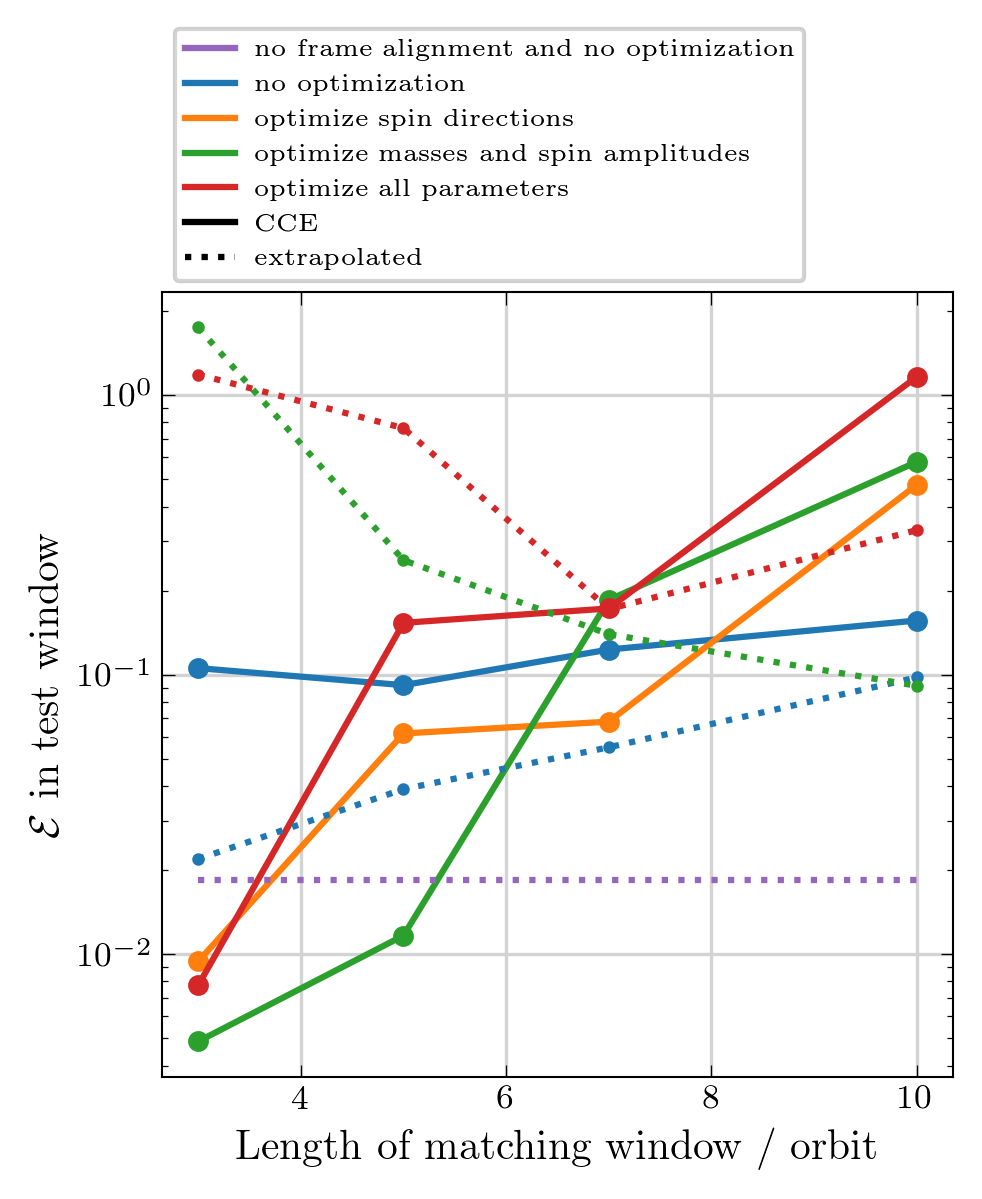

In [72]:
import matplotlib.pyplot as plt
from matplotlib.transforms import Bbox
import numpy as np
plt.style.use('paper.mplstyle')
x=np.array([3,5,7,10])
y1=np.array([0.10566797172812879, 0.09182674800841038,0.1231408295917777,0.15641124631629597])
y1E=np.array([0.021921917970639533,0.03899790302036674,0.055035005237674635,0.09784472438776749])
y2=np.array([0.00943173199809403,0.061675742498961565,0.06800254197612943,0.47826889762722935])
#y3=np.array([0.007080169590819177,0.026370548017998385,0.03933649513629426,0.1483929619670797])
y4=np.array([0.0077377261933202724,0.15341870327256946,0.17275290533789267,1.1644798735910893])
y4E=np.array([1.186237071862778,0.7627110919158587,0.17185702379403503,0.3292017866091701])
y6=np.array([0.004879508936515607,0.011670781759517556,0.18531226734309153,0.5778549889464137])
y6E=np.array([1.748724888666158,0.2570347497823834,0.13973479004828965,0.0913369234334441])
fig1, (ax1) = plt.subplots(1,1)
ax1.plot(x,y1,marker='o',markersize=4, label='no ptimization')
ax1.plot(x,y2,marker='o',markersize=4, label='optimize spin directions')
ax1.plot(x,y6,marker='o',markersize=4, label='optimize masses and spin amplitudes')
ax1.plot(x,y4,marker='o',markersize=4, label='optimize all parameters')
ax1.plot(x,y1E,marker='o',markersize=2, color='#1f77b4',linestyle='dotted')
ax1.plot(x,y6E,marker='o',markersize=2, color='#2ca02c',linestyle='dotted')
ax1.plot(x,y4E,marker='o',markersize=2, color='#d62728',linestyle='dotted')
ax1.plot(x,0.018521879029656067*np.ones(4), linestyle='dotted')
#ax1.plot(x,y4E,marker='o',markersize=4, label='optimize all parameters',color='#d62728',linestyle='dotted')
line_legend = plt.legend(handles=[
    plt.Line2D([], [], color='#9467bd'),
    plt.Line2D([], [], color='#1f77b4'),
    plt.Line2D([], [], color= '#ff7f0e'),
    plt.Line2D([], [], color='#2ca02c'),
    plt.Line2D([], [], color='#d62728'),
    plt.Line2D([], [], color='black'),
    plt.Line2D([], [], color='black', linestyle='dotted')],
                          labels=['no frame alignment and no optimization','no optimization','optimize spin directions',
                                  'optimize masses and spin amplitudes','optimize all parameters',
                                  'CCE', 'extrapolated'],
    ncols=1,loc='upper left', bbox_to_anchor=(0, 1.35)
                          )
ax1.add_artist(line_legend)
ax1.set_yscale('log')
ax1.set_ylabel(r'$\mathcal{E}$'+' in test window')
ax1.set_xlabel("Length of matching window / orbit")
fig1.set_size_inches(3.4,3.4)
bbox = Bbox.from_extents(-0.05,0.0,3.1,3.9)
plt.grid()
fig1.savefig("WindowShort.pdf", bbox_inches = bbox)

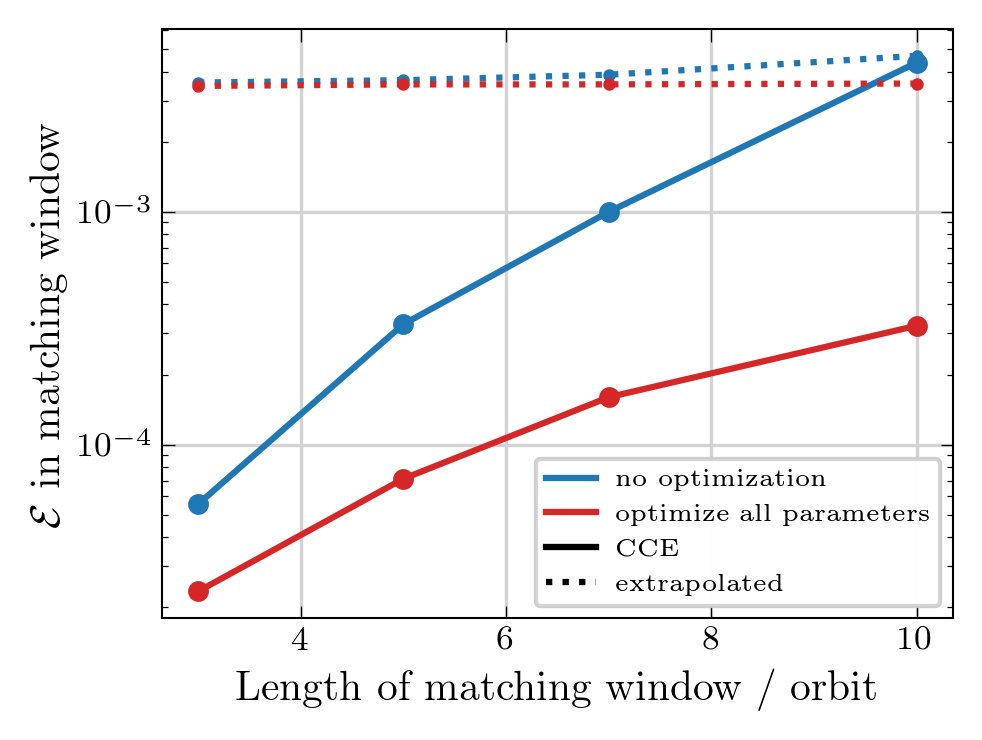

In [40]:
import matplotlib.pyplot as plt
import numpy as np
plt.style.use('paper.mplstyle')
x=np.array([3,5,7,10])
y1=np.array([5.55207866e-05,3.29094429e-04,9.98635363e-04,4.36915055e-03])
y1E=np.array([3.58738069e-03,3.67134314e-03,3.87455061e-03,4.66885855e-03])
y4=np.array([2.34377640e-05,7.13849952e-05,1.59838472e-04,3.24019323e-04])
y4E=np.array([3.46845160e-03,3.52002968e-03,3.52142861e-03,0.0035511])
fig1, (ax1) = plt.subplots(1,1)
ax1.plot(x,y1,marker='o',markersize=4, label='no ptimization')
ax1.plot(x,y4,marker='o',markersize=4, color='#d62728',label='optimize all parameters')
ax1.plot(x,y1E,marker='o',markersize=2, color='#1f77b4',linestyle='dotted')
ax1.plot(x,y4E,marker='o',markersize=2, color='#d62728',linestyle='dotted')
#ax1.plot(x,y4E,marker='o',markersize=4, label='optimize all parameters',color='#d62728',linestyle='dotted')
ax1.legend()
line_legend = plt.legend(handles=[
    plt.Line2D([], [], color='#1f77b4'),
    plt.Line2D([], [], color='#d62728'),
    plt.Line2D([], [], color='black'),
    plt.Line2D([], [], color='black', linestyle='dotted')],
                          labels=['no optimization','optimize all parameters',
                                  'CCE', 'extrapolated'],
                          )
ax1.add_artist(line_legend)
ax1.set_yscale('log')
ax1.set_ylabel(r'$\mathcal{E}$'+' in matching window')
ax1.set_xlabel("Length of matching window / orbit")
plt.grid()
fig1.savefig("WindowShortMatching.pdf", bbox_inches = 'tight')

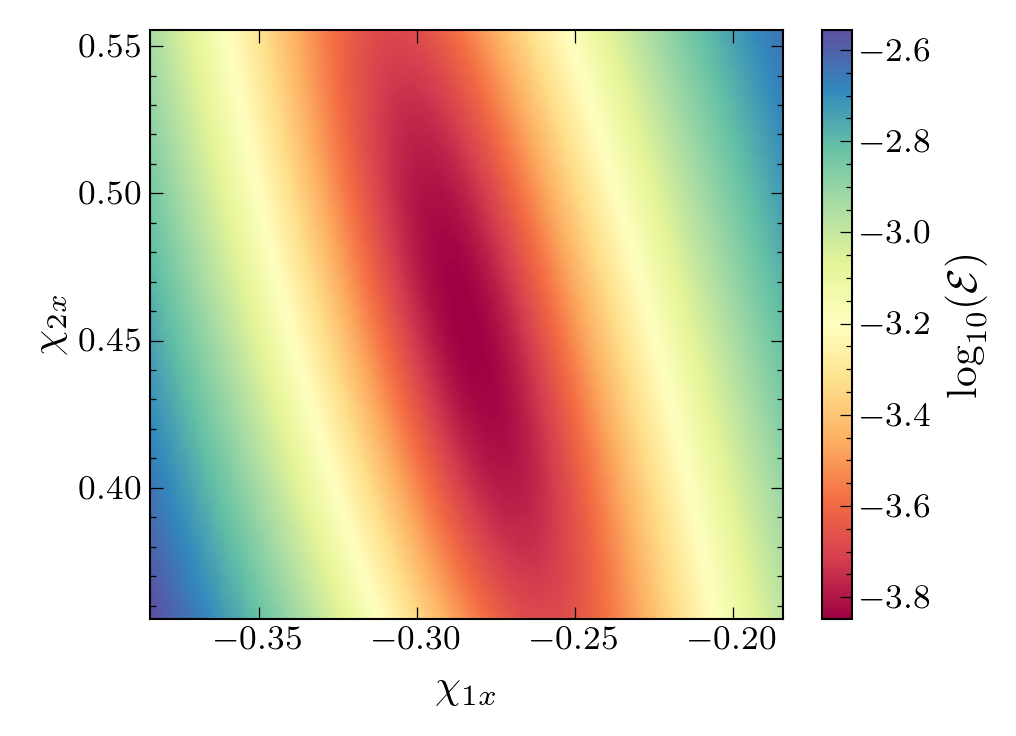

In [13]:
import numpy as np
import matplotlib.pyplot as plt
from matplotlib.ticker import MultipleLocator
plt.style.use('paper.mplstyle')
PhyParas=np.array([ 1.63268286,  1.00076811, -0.28427555 ,-0.30800411, -0.20941212,  0.45555349,
 -0.02362093 , 0.15372206 ,-8.34474126,  0.01045971, -0.02634946, -0.06328647])
temp = np.copy(PhyParas)
xx = np.linspace(PhyParas[2]-0.1,PhyParas[2]+0.1, 100)
yy = np.linspace(PhyParas[5]-0.1,PhyParas[5]+0.1, 100)
X, Y = np.meshgrid(xx, yy)
Z=np.loadtxt('/panfs/ds09/sxs/dzsun/Hybrid/12d/PAPER/costprofile/s1x2x.txt',delimiter=',')
fig, ax1 = plt.subplots(1,1)
pcm = ax1.pcolormesh(X, Y, Z-10, cmap='Spectral',shading="gouraud" )
ax1.set_xlabel(r'$\mathbf{\chi}_{1x}$')
ax1.set_ylabel(r'$\mathbf{\chi}_{2x}$')
locator = MultipleLocator(0.05)  # Place ticks every 1 unit
ax1.yaxis.set_major_locator(locator)
cbar = fig.colorbar(pcm, ax=ax1)
cbar.set_label(r'$\log_{10}(\mathcal{E})$')
fig.savefig("Cost_s1x2x.pdf")

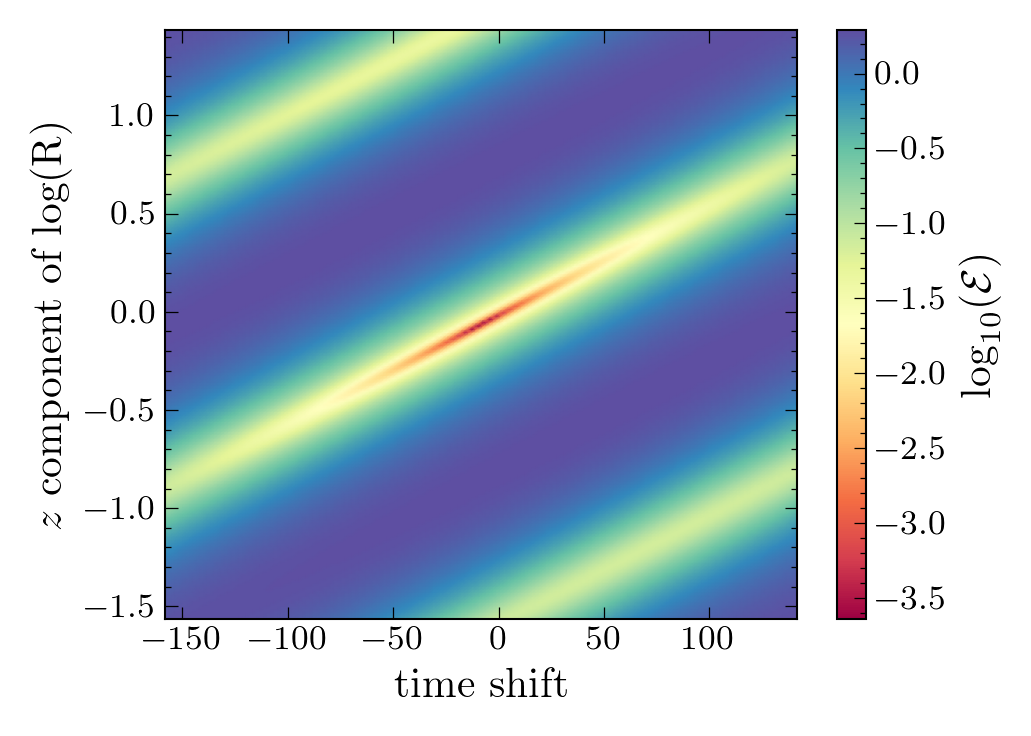

In [16]:
import numpy as np
import matplotlib.pyplot as plt
plt.style.use('paper.mplstyle')
PhyParas=np.array([ 1.63268286,  1.00076811, -0.28427555 ,-0.30800411, -0.20941212,  0.45555349,
 -0.02362093 , 0.15372206 ,-8.34474126,  0.01045971, -0.02634946, -0.06328647])
temp = np.copy(PhyParas)
xx = np.linspace(PhyParas[8]-150,PhyParas[8]+150, 180)
yy = np.linspace(PhyParas[11]-1.5,PhyParas[11]+1.5, 180)
X, Y = np.meshgrid(xx, yy)
Z=np.loadtxt('/panfs/ds09/sxs/dzsun/Hybrid/12d/PAPER/costprofile/tRz01.txt',delimiter=',')
fig, ax1 = plt.subplots(1,1)
pcm = ax1.pcolormesh(X,Y,Z-10, cmap='Spectral',shading="gouraud" )
ax1.set_xlabel('time shift')
ax1.set_ylabel(r'$z$'+' component of '+r'$\log(\mathbf{\mathrm{R}})$')
cbar = fig.colorbar(pcm, ax=ax1)
cbar.set_label(r'$\log_{10}(\mathcal{E})$')
fig.savefig("Cost_tRz.pdf")

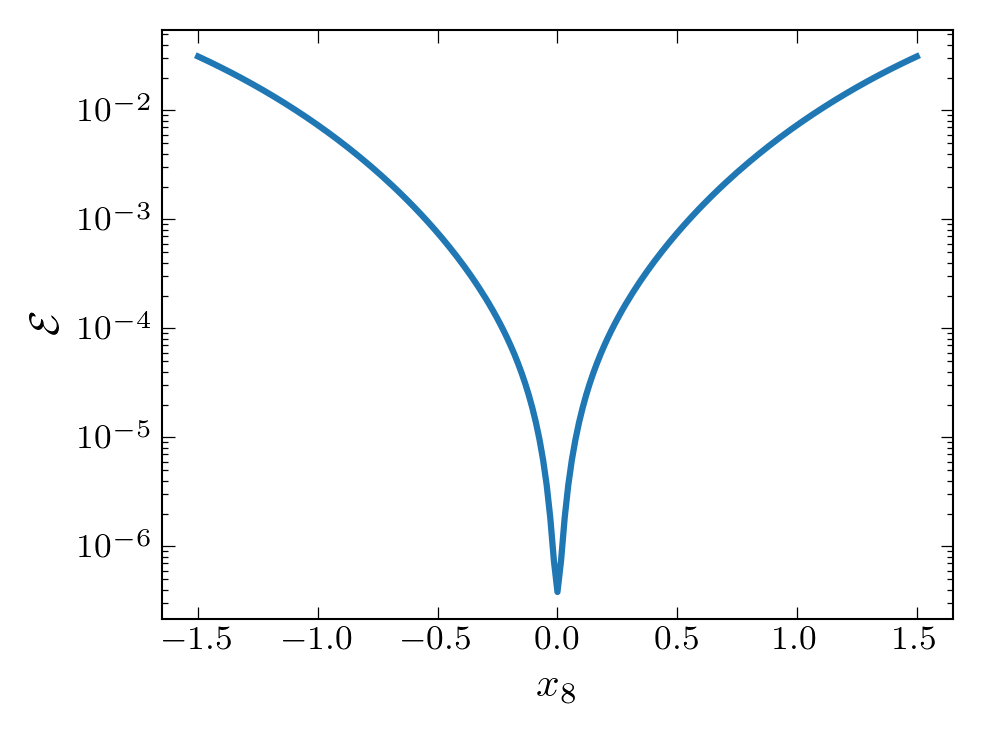

In [18]:
import numpy as np
import matplotlib.pyplot as plt
plt.style.use('paper.mplstyle')
PhyParas=np.array([ 1.00665404e+00,  9.97667967e-01,  9.67992878e-01,
  1.11854617e+00,  3.04598331e-05, -2.16970643e-04,  3.10414935e+00,
  1.71199944e-04,  1.43391253e-01,  2.81812571e-06,  2.59011177e-05,
  7.21704571e-01])
temp = np.copy(PhyParas)
xx = np.linspace(PhyParas[7]-1.5,PhyParas[7]+1.5, 201)
yy = np.linspace(PhyParas[11]-1.5,PhyParas[11]+1.5, 180)
X, Y = np.meshgrid(xx, yy)
Z=np.loadtxt('/panfs/ds09/sxs/dzsun/Hybrid/12d/PAPER/costprofile/x8.txt',delimiter=',')
#for i in range(len(xx)):
#    for j in range(len(yy)):
#        Z[j,i]=xx[i]
fig, ax1 = plt.subplots(1,1)
#pcm = ax1.pcolormesh(X,Y,Z-10, cmap='Spectral',shading="gouraud" )
ax1.set_xlabel(r'$x_8$')
ax1.set_ylabel(r'$\mathcal{E}$')
#cbar = fig.colorbar(pcm, ax=ax1)
#cbar.set_label(r'$\log_{10}(\mathcal{E})$')
ax1.plot(xx,10**(Z-10))
ax1.set_yscale('log')
fig.savefig("Cost_x8.pdf")

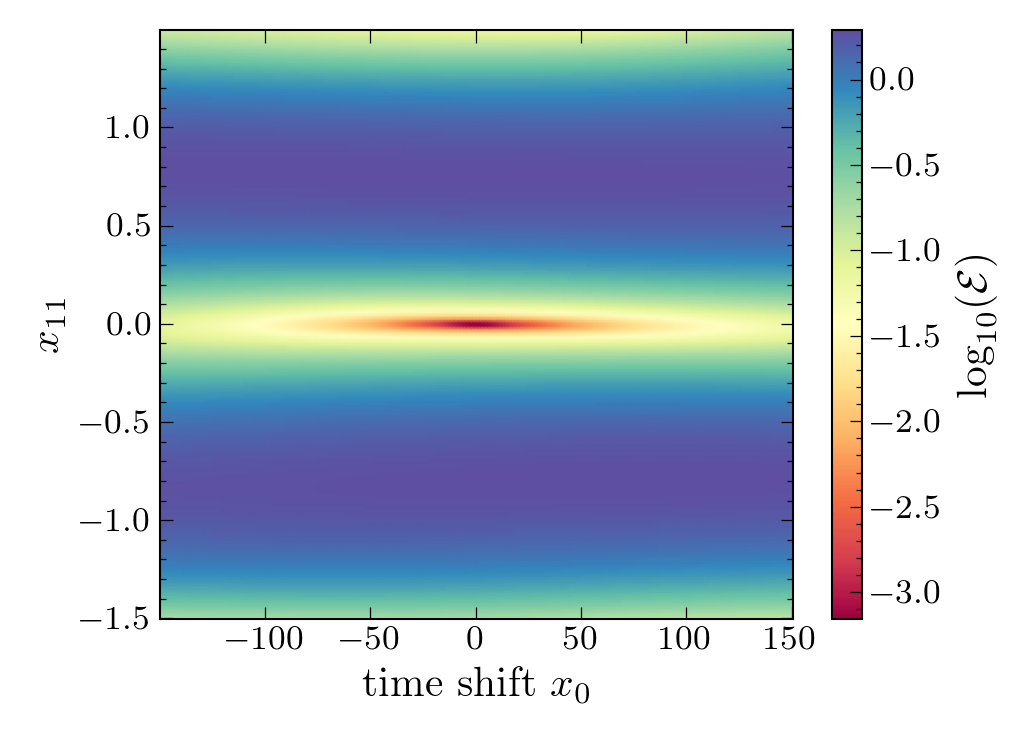

In [5]:
import numpy as np
import matplotlib.pyplot as plt
plt.style.use('paper.mplstyle')
PhyParas=np.array([1.00001696e+00,  9.99218162e-01,  9.99028229e-01,
  1.01696308e+00,  4.51779271e-02, -2.81460483e-02, -7.62382154e-02,
 -6.92423669e-02,  4.40386672e-01, -6.31739687e-02, -1.73849487e-02,
 -2.13108610e-03])
temp = np.copy(PhyParas)
xx = np.linspace(PhyParas[8]-150,PhyParas[8]+150, 180)
yy = np.linspace(PhyParas[11]-1.5,PhyParas[11]+1.5, 180)
X, Y = np.meshgrid(xx, yy)
Z=np.loadtxt('/panfs/ds09/sxs/dzsun/Hybrid/12d/PAPER/costprofile/tRzNew.txt',delimiter=',')
#for i in range(len(xx)):
#    for j in range(len(yy)):
#        Z[j,i]=xx[i]
fig, ax1 = plt.subplots(1,1)
pcm = ax1.pcolormesh(X,Y,Z-10, cmap='Spectral',shading="gouraud" )
ax1.set_xlabel('time shift '+r'$x_0$')
ax1.set_ylabel(r'$x_{11}$')
cbar = fig.colorbar(pcm, ax=ax1)
cbar.set_label(r'$\log_{10}(\mathcal{E})$')
fig.savefig("Cost_tRzNew.pdf")

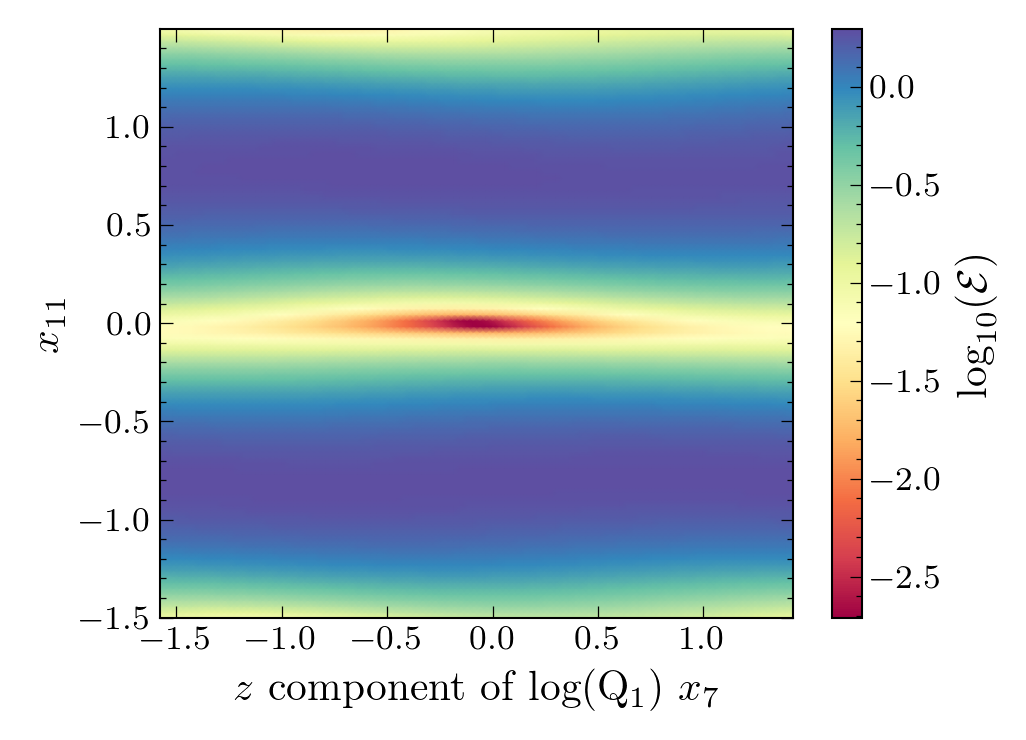

In [12]:
import numpy as np
import matplotlib.pyplot as plt
plt.style.use('paper.mplstyle')
PhyParas=np.array([1.00001696e+00,  9.99218162e-01,  9.99028229e-01,
  1.01696308e+00,  4.51779271e-02, -2.81460483e-02, -7.62382154e-02,
 -6.92423669e-02,  4.40386672e-01, -6.31739687e-02, -1.73849487e-02,
 -2.13108610e-03])
temp = np.copy(PhyParas)
xx = np.linspace(PhyParas[6]-1.5,PhyParas[6]+1.5, 100)
yy = np.linspace(PhyParas[11]-1.5,PhyParas[11]+1.5, 100)
X, Y = np.meshgrid(xx, yy)
Z=np.loadtxt('/panfs/ds09/sxs/dzsun/Hybrid/12d/PAPER/costprofile/Q1zRzNew.txt',delimiter=',')
#for i in range(len(xx)):
#    for j in range(len(yy)):
#        Z[j,i]=xx[i]
fig, ax1 = plt.subplots(1,1)
pcm = ax1.pcolormesh(X,Y,Z-10, cmap='Spectral',shading="gouraud" )
ax1.set_xlabel(r'$z$'+' component of '+r'$\log(\mathbf{\mathrm{Q}}_1)$'+' '+r'$x_7$')
ax1.set_ylabel(r'$x_{11}$')
cbar = fig.colorbar(pcm, ax=ax1)
cbar.set_label(r'$\log_{10}(\mathcal{E})$')
fig.savefig("Cost_Q1zRzNew.pdf")

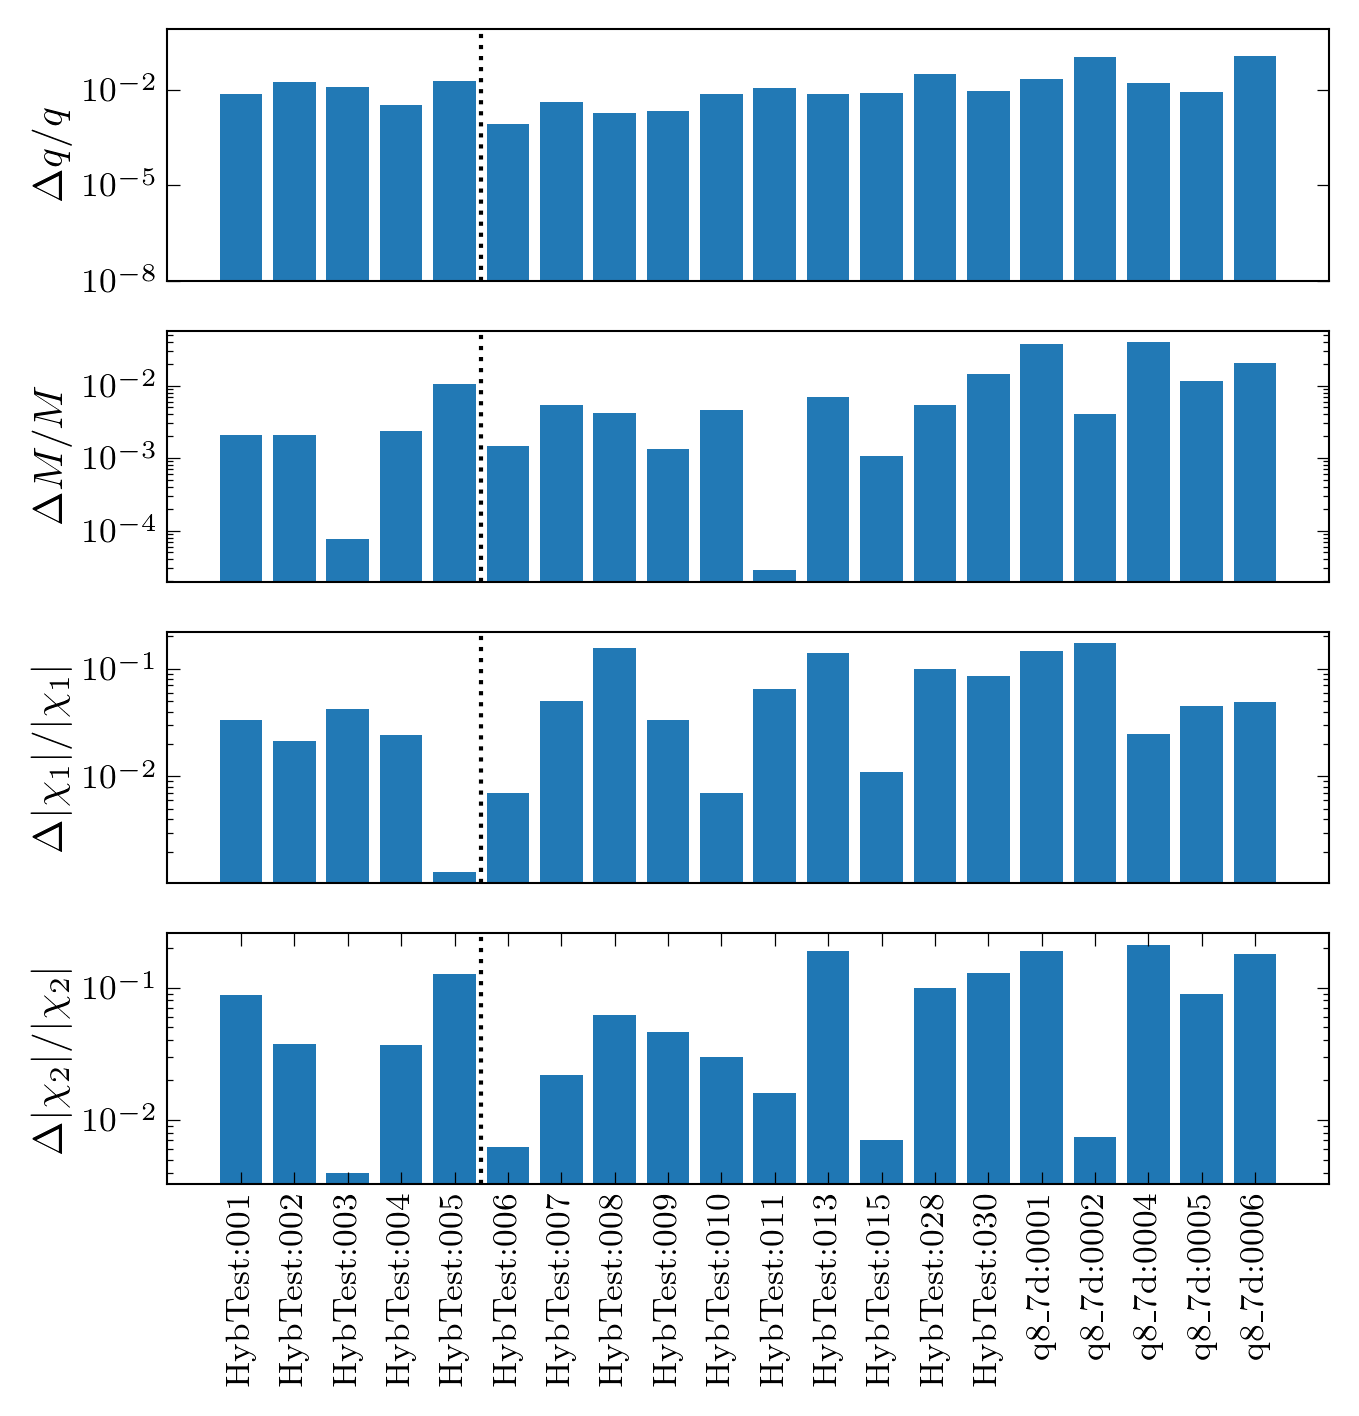

In [68]:
import matplotlib.pyplot as plt
import numpy as np
plt.rcParams.update({'font.size': 60})

x=np.arange(20)
x_ticks=['HybTest:001', 'HybTest:002', 'HybTest:003', 'HybTest:004', 'HybTest:005', 'HybTest:006', 'HybTest:007', 'HybTest:008', 'HybTest:009', 'HybTest:010', 'HybTest:011', 'HybTest:013', 'HybTest:015', 'HybTest:028', 'HybTest:030', 'q8_7d:0001', 'q8_7d:0002', 'q8_7d:0004', 'q8_7d:0005', 'q8_7d:0006']
q=np.array([.00766504,.01750343,.01200575,.00332242,.01860404,-0.0008689969999999825,.00406383,-0.0019269939999999597,0.0022135,-0.007183049999999969,
            -0.011800841000000006,-0.007374283999999953,.00822139,-0.030747720000000034,-0.00942903500000003,-0.02249602500000003,-0.10718954300000005,.01688017,.00885582,-0.11662874000000001])
M=np.array([-0.0021063869999999874,-0.0021083490000000094,.00007734,-0.002336890000000036,.01065143,-0.0014886429999999562,-0.005443245000000041,-0.004229023000000054,0.00134523,-0.004616001000000036,
            -2.8244999999982312e-05,-0.006892494000000027,-0.0010663319999999477,-0.005332849999999945,-0.014461783000000006,-0.037957200000000024,-0.0040298319999999554,.03970657,.01149178,-0.02064359199999999])
s1=np.array([-0.033290398,-0.021482610400000002,.04221190,-0.024008764500000002,-0.0013089139999999944,.00703246,.05051586,.15396039,-0.0332,-0.007010466999999965,
             .06471447,-0.13915016199999997,.01098899,-0.09989854099999995,-0.08540612999999997,-0.14584561299999999,.17138367,-0.024959319000000035,.04503942,.04863970])
s2=np.array([.08708782,-0.0373322312,-0.003971535000000026,-0.0365457904,.12631752,.00620454,-0.021810003000000022,.06159159,-0.04648,-0.029671668999999956,
             .01603702,-0.18949244899999995,.00709957,.09949847,.12975536,.18946805,-0.007414463000000038,.21044437,.09001612,.18019586])
fig1, (ax1,ax2,ax3,ax4) = plt.subplots(4,1,figsize=(5, 5))
width=0.8
plt.xticks(x, x_ticks, rotation=90)
ax1.bar(x,abs(q), label='Extrapolated all modes',hatch='',alpha=0.99)
ax2.bar(x,abs(M), label=r'Extrapolated $m\neq 0$ modes',hatch='',alpha=0.99)
ax3.bar(x,abs(s1), label=r'Extrapolated $m\neq 0$ modes, fixing PN parameters',hatch='',alpha=0.99)
ax4.bar(x,abs(s2), label='CCE fixing BMS frame')
ax1.axvline(4.5, linestyle='dotted', linewidth=1,color='k')
ax2.axvline(4.5, linestyle='dotted', linewidth=1,color='k')
ax3.axvline(4.5, linestyle='dotted', linewidth=1,color='k')
ax4.axvline(4.5, linestyle='dotted', linewidth=1,color='k')
ax1.set_yscale('log')
ax2.set_yscale('log')
ax3.set_yscale('log')
ax4.set_yscale('log')
ax1.get_xaxis().set_visible(False)
ax2.get_xaxis().set_visible(False)
ax3.get_xaxis().set_visible(False)
ax1.set_ylabel(r'$\Delta q/q$')
ax2.set_ylabel(r'$\Delta M/M$')
ax3.set_ylabel(r'$\Delta |\chi_1|/|\chi_1|$')
ax4.set_ylabel(r'$\Delta |\chi_2|/|\chi_2|$')
#ax1.set_xlabel("Length of matching window in orbits")
ax1.set_ylim((1e-8,0.8))
fig1.savefig("Parameter.pdf",format="pdf",dpi=1000, bbox_inches = 'tight')